In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(style='ggplot')
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#Reading the file with the 2019 to 2020 comparative data into a datafram 

link19to20 = "https://www150.statcan.gc.ca/n1/en/daily-quotidien/200901/t001a-eng.csv?st=W0k6TqcZ"
crime19to20 = pd.read_csv(link19to20, skiprows = 5, names = ["MarJune19", "MarJune20", "Diff", "PerDiff"])
crime19to20.drop(crime19to20.index[-9:], inplace = True)

In [3]:
# another way to download csv file and save it in local folder
# in case the access is pervented by website

# import requests
#url = "https://www150.statcan.gc.ca/n1/en/daily-quotidien/200901/t001a-eng.csv"
#req = requests.get(url)
#url_content = req.content
#csv_file = open('crime19to20.csv', 'wb')
#csv_file.write(url_content)
#csv_file.close()

#crime19to20 = pd.read_csv('crime19to20.csv', skiprows=5, names = ["MarJune19", "MarJune20", "Diff", "PerDiff"])
#crime19to20.drop(crime19to20.index[-9:], inplace = True)

ANALYSIS PART 1 - CRIME STATISTICS IN CANADA BETWEEN MARCH AND JUNE 2019 VS. MARCH AND JUNE 2020

1. Comparing the difference in number of crimes between March-June 2019 and March-June 2020 
        a. Preparing the data 
        b. Checking correlation between 2019 and 2020 values 
        c. Checking the increase and decrease between individual types of crime between 2019 and 2020

In [4]:
crime19to20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Total criminal incidents to Child custody matter - domestic
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MarJune19  35 non-null     object 
 1   MarJune20  35 non-null     float64
 2   Diff       35 non-null     object 
 3   PerDiff    35 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.4+ KB


In [5]:
crime19to20.isnull().values.any()

True

In [6]:
# From the result of the info() function, we can see that some datatypes are "objects" when they should be numeric

crime19to20 = crime19to20.apply(pd.to_numeric, downcast = 'integer', errors = 'ignore').replace('...',0).dropna()
crime19to20 = crime19to20.apply(pd.to_numeric, downcast = 'integer', errors = 'ignore').replace('...',0).dropna()


In [7]:
crime19to20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, Total criminal incidents to Child custody matter - domestic
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MarJune19  35 non-null     int32  
 1   MarJune20  35 non-null     int32  
 2   Diff       35 non-null     int32  
 3   PerDiff    35 non-null     float64
dtypes: float64(1), int32(3)
memory usage: 980.0+ bytes


In [8]:
# Removing totals to not skew the data as totals are the sum of the rows below. 

crime19to20unq = crime19to20[~crime19to20.index.str.contains("Total")]

In [9]:
# Removing totals to not skew the data as totals are the sum of the rows below. 

crime19to20unq = crime19to20unq[crime19to20unq.index != "Uttering threats"]

In [10]:
# calculate the correlation coefficient.
# There is a pretty strong correlation between MarJune19 and MarJune20 across all the criminal incidents and calls for service.

crime19to20unq['MarJune19'].corr(crime19to20unq['MarJune20'])

0.9400254749846532

In [11]:
x = crime19to20unq['MarJune19']
y = crime19to20unq['MarJune20']

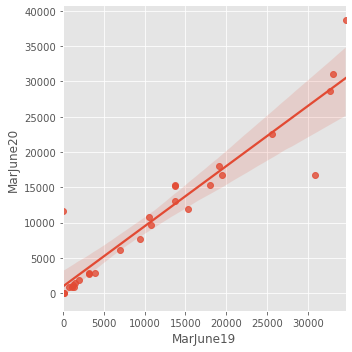

In [12]:
# plt.plot(x,y)

sns.lmplot("MarJune19", "MarJune20", data = crime19to20unq)

In [13]:
# Assumption: The covid-19 pandemic started from March 2020. People's outdoor social activities have been
# limited. So the outdoor activity relationed criminal incidents should go down during the pandemic comparing to
# the same period of last year, such as assaults, sexual assaults, robbery, 
# dangerous operation causing death or bodily harm, impaired driving, causing death or bodily harm .
# On the other hand, since people were working at home remotely and students were taking classes remotely,
# the majority of people's daily activities switched to indoor, so the domestic distubance/disputes within families,
# and mental health related services may go up during the pandemic.

In [14]:
crime19to20_PerDiff10 = crime19to20unq.loc[(crime19to20unq['PerDiff']>=10) | (crime19to20unq['PerDiff']<=-10)]
crime19to20_PerDiff10

,MarJune19,MarJune20,Diff,PerDiff
"Assaults by non-family (levels 1, 2, 3)",32681,28702,-3979,-12.2
Assaults where relationship type is unknown,9409,7619,-1790,-19.0
"Sexual assaults by non-family (levels 1, 2, 3)",3859,2828,-1031,-26.7
"Sexual assaults by family (levels 1, 2, 3)",1040,856,-184,-17.7
Sexual assaults where relationship type is unknown,1350,902,-448,-33.2
Uttering threats by non-family,7033,6179,-854,-12.1
Uttering threats where relationship type is unknown,3168,2764,-404,-12.8
"Dangerous operation, causing death or bodily harm",130,99,-31,-23.8
"Impaired driving, causing death or bodily harm",147,100,-47,-32.0
"Breaking and entering, residential",15353,11992,-3361,-21.9


In [15]:
crime19to20_PerDiff10 = crime19to20_PerDiff10.reset_index()
crime19to20_PerDiff10 = pd.melt(crime19to20_PerDiff10, id_vars= ['index'], value_vars = ['MarJune19','MarJune20'], var_name = 'March_to_June', value_name = 'count')

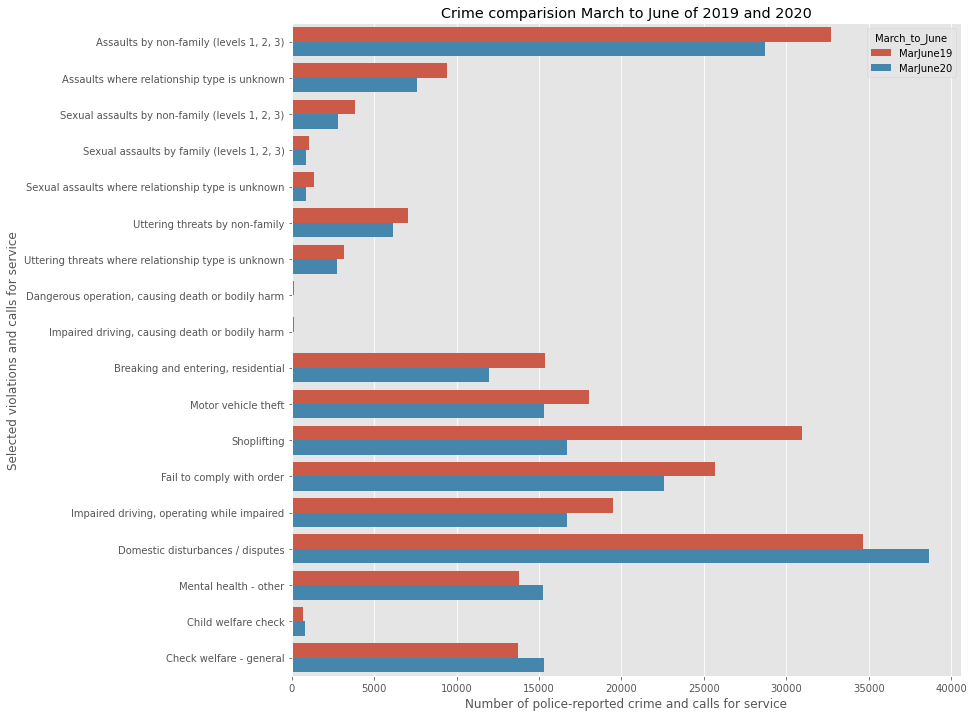

In [16]:
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(y = 'index', x = "count", hue = 'March_to_June', data=crime19to20_PerDiff10, ax=ax)
ax.set(title='Crime comparision March to June of 2019 and 2020', xlabel='Number of police-reported crime and calls for service', ylabel='Selected violations and calls for service');

In [17]:
# We would like to check the types of crime where there was a change of over +/- 10% between 2019 and 2020

crime19to20_selected1 = crime19to20unq.loc[(crime19to20unq['PerDiff']>=10) | (crime19to20unq['PerDiff']<=-10)]
crime19to20_selected1 = crime19to20_selected1.reset_index()

In [18]:
crime19to20_selected1

,index,MarJune19,MarJune20,Diff,PerDiff
0,"Assaults by non-family (levels 1, 2, 3)",32681,28702,-3979,-12.2
1,Assaults where relationship type is unknown,9409,7619,-1790,-19.0
2,"Sexual assaults by non-family (levels 1, 2, 3)",3859,2828,-1031,-26.7
3,"Sexual assaults by family (levels 1, 2, 3)",1040,856,-184,-17.7
4,Sexual assaults where relationship type is unk...,1350,902,-448,-33.2
5,Uttering threats by non-family,7033,6179,-854,-12.1
6,Uttering threats where relationship type is un...,3168,2764,-404,-12.8
7,"Dangerous operation, causing death or bodily harm",130,99,-31,-23.8
8,"Impaired driving, causing death or bodily harm",147,100,-47,-32.0
9,"Breaking and entering, residential",15353,11992,-3361,-21.9


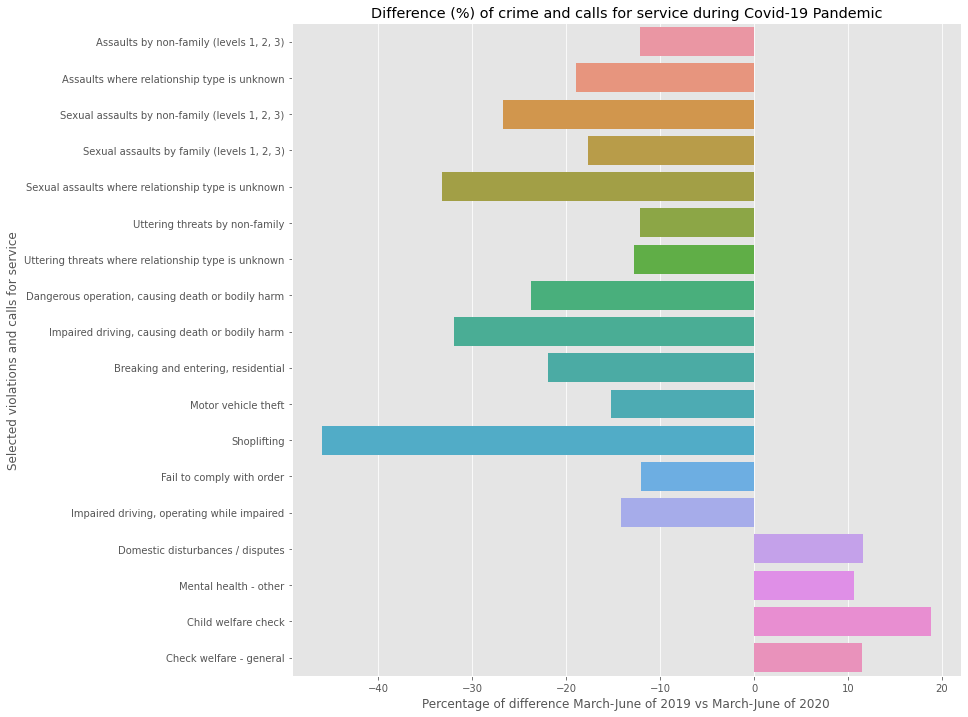

In [19]:
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(y = 'index', x = "PerDiff", data=crime19to20_selected1, ax=ax)
ax.set(title='Difference (%) of crime and calls for service during Covid-19 Pandemic', xlabel='Percentage of difference March-June of 2019 vs March-June of 2020', ylabel='Selected violations and calls for service')
None

In [20]:
# We would like to narrow down the types of crime and see the impact of COVID (or lack thereof)

crime19to20_melt = crime19to20.reset_index()
crime19to20_melt = pd.melt(crime19to20_melt, id_vars= ['index'], value_vars = ['MarJune19','MarJune20'], var_name = 'March_to_June', value_name = 'count')
crime19to20_subset = crime19to20_melt.loc[crime19to20_melt['index'].str.contains("Total") | crime19to20_melt['index'].str.contains("causing death or bodily harm") | crime19to20_melt['index'].str.contains("Domestic disturbances") | crime19to20_melt['index'].str.contains("Mental health - other") | crime19to20_melt['index'].str.contains("Child welfare check")]


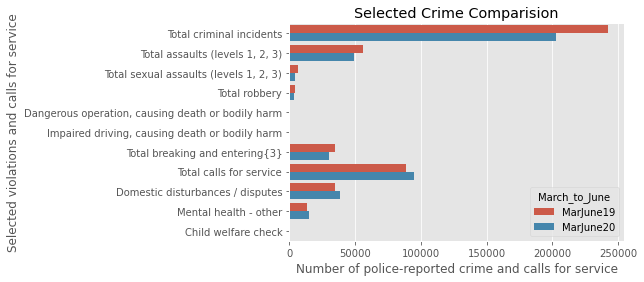

In [21]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(y = 'index', x = "count", hue = 'March_to_June', data=crime19to20_subset, ax=ax)
ax.set(title='Selected Crime Comparision', xlabel='Number of police-reported crime and calls for service', ylabel='Selected violations and calls for service')
None

In [22]:
# As compared to the data of March to June of 2019, 
# the violations and call for service are going up during March to June of 2020 shown below:

crime19to20_up = crime19to20unq.loc[(crime19to20unq['PerDiff']>0)]

In [23]:
crime19to20_up = crime19to20_up.reset_index()
crime19to20_up

,index,MarJune19,MarJune20,Diff,PerDiff
0,Uttering threats by family,1476,1522,46,3.1
1,Domestic disturbances / disputes,34632,38665,4033,11.6
2,Mental Health Act apprehension,10529,10822,293,2.8
3,Mental health - other,13759,15223,1464,10.6
4,Child welfare check,701,833,132,18.8
5,Check welfare - general,13711,15294,1583,11.5
6,Child custody matter - domestic,1209,1229,20,1.7


In [24]:
crime19to20_up = pd.melt(crime19to20_up, id_vars= ['index'], value_vars = ['MarJune19','MarJune20'], var_name = 'March_to_June', value_name = 'count')

[Text(0.5, 1.0, 'Crime increased in Canada during March to June of 2020')]

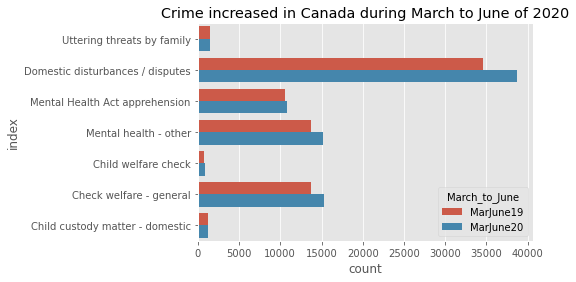

In [25]:
# this graph only captures the increased criminal types

ax = sns.barplot(y = 'index', x = "count", hue = 'March_to_June', data=crime19to20_up)
ax.set(title='Crime increased in Canada during March to June of 2020')

SUMMARY OF PART 1 : 
From the above, we see that our assumptions hold true. Domestic crimes and mental health issues went up between 2019 and 2020. We will later analyze crime and covid data to check for relationships between the two. 

PART 2 - CHECKING 2020 STATISTICS - CRIME WITHIN PROVINCES OF CANADA


1. Reading and cleaning the data to make it ready for analysis 
1. Checking trend in crime over time regardless of type of crime 
2. Checking trend in crime over time based on type of crime 

In [26]:
# Reading file containing per province crime information in 2020 by date 

import zipfile
import io
import requests

ziplink = "https://www150.statcan.gc.ca/n1/en/tbl/csv/35100169-eng.zip?st=RA3Al23Q"
r = requests.get(ziplink)
file1 = zipfile.ZipFile(io.BytesIO(r.content))

zipfile.ZipFile.infolist(file1);

In [27]:
crime20file = file1.open('35100169.csv')
crime20 = pd.read_csv(crime20file)
crime20.loc[crime20.VALUE.isnull()]

,REF_DATE,GEO,DGUID,Violations and calls for service,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
59,2020-03,"Kennebecasis Region, New Brunswick, municipal ...",13024,"Calls for service, Mental Health Act (MHA) app...",Actual incidents,Number,223,units,0,v1210497378,2.27.1,NaN,..,NaN,NaN,0
63,2020-03,"Kennebecasis Region, New Brunswick, municipal ...",13024,"Calls for service, child welfare check",Actual incidents,Number,223,units,0,v1210497382,2.31.1,NaN,..,NaN,NaN,0
64,2020-03,"Kennebecasis Region, New Brunswick, municipal ...",13024,"Calls for service, check welfare - general",Actual incidents,Number,223,units,0,v1210497383,2.32.1,NaN,..,NaN,NaN,0
76,2020-03,"Ottawa, Ontario, municipal [35010]",35010,Uttering threats by non-family,Actual incidents,Number,223,units,0,v1210497395,3.11.1,NaN,..,NaN,NaN,0
77,2020-03,"Ottawa, Ontario, municipal [35010]",35010,Uttering threats by family,Actual incidents,Number,223,units,0,v1210497396,3.12.1,NaN,..,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,2020-08,Royal Canadian Mounted Police [99C01],99C01,"Calls for service, suicide/attempted suicide",Actual incidents,Number,223,units,0,v1210497875,17.29.1,NaN,..,NaN,NaN,0
3362,2020-08,Royal Canadian Mounted Police [99C01],99C01,"Calls for service, overdose",Actual incidents,Number,223,units,0,v1210497876,17.30.1,NaN,..,NaN,NaN,0
3363,2020-08,Royal Canadian Mounted Police [99C01],99C01,"Calls for service, child welfare check",Actual incidents,Number,223,units,0,v1210497877,17.31.1,NaN,..,NaN,NaN,0
3364,2020-08,Royal Canadian Mounted Police [99C01],99C01,"Calls for service, check welfare - general",Actual incidents,Number,223,units,0,v1210497878,17.32.1,NaN,..,NaN,NaN,0


In [28]:
# Each province basically has the same crime categories repeated so would it make sense to group by them? 
# This was a first test and will be changed 

crimegroup = crime20.groupby(["GEO", "Violations and calls for service"]).sum()

In [29]:
crimegroup

UOM_ID  \
GEO                                     Violations and calls for service                             
Calgary, Alberta, municipal [48014]     Assault against peace or public officer (level ...    1338   
                                        Assaults by family (levels 1, 2, 3)                   1338   
                                        Assaults by non-family (levels 1, 2, 3)               1338   
                                        Assaults where relationship type is unknown           1338   
                                        Breaking and entering, non-residential                1338   
...                                                                                            ...   
York Region, Ontario, municipal [35335] Total sexual assaults (levels 1, 2, 3) [131]          1338   
                                        Uttering threats [1627]                               1338   
                                        Uttering threats by family                            1338   
                                        Uttering threats by non-family                        1338   
                                        Uttering threats where relationship type is unk...    1338   

                                                                                            SCALAR_ID  \
GEO                                     Violations and calls for service                                
Calgary, Alberta, municipal [48014]     Assault against peace or public officer (level ...          0   
                                        Assaults by family (levels 1, 2, 3)                         0   
                                        Assaults by non-family (levels 1, 2, 3)                     0   
                                        Assaults where relationship type is unknown                 0   
                                        Breaking and entering, non-residential                      0   
...                                                                                               ...   
York Region, Ontario, municipal [35335] Total sexual assaults (levels 1, 2, 3) [131]                0   
                                        Uttering threats [1627]                                     0   
                                        Uttering threats by family                                  0   
                                        Uttering threats by non-family                              0   
                                        Uttering threats where relationship type is unk...          0   

                                                                                             VALUE  \
GEO                                     Violations and calls for service                             
Calgary, Alberta, municipal [48014]     Assault against peace or public officer (level ...   135.0   
                                        Assaults by family (levels 1, 2, 3)                 1830.0   
                                        Assaults by non-family (levels 1, 2, 3)             1917.0   
                                        Assaults where relationship type is unknown            0.0   
                                        Breaking and entering, non-residential              3324.0   
...                                                                                            ...   
York Region, Ontario, municipal [35335] Total sexual assaults (levels 1, 2, 3) [131]         153.0   
                                        Uttering threats [1627]                              595.0   
                                        Uttering threats by family                           103.0   
                                        Uttering threats by non-family                       492.0   
                                        Uttering threats where relationship type is unk...     0.0   

                                                                        

In [30]:
# Dropping extra columns that have no impact on the analysis

crime20.drop(["DGUID", "UOM", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "Statistics", "VECTOR", "COORDINATE", "STATUS", "SYMBOL", "TERMINATED", "DECIMALS"], axis = 1, inplace = True)


In [31]:
# Dropping the "total" columns as they are just the sum of the multiple rows below them. 

crime20 = crime20[~crime20["Violations and calls for service"].str.contains("Total") == True]


In [32]:
# Dropping the "total" columns as they are just the sum of the multiple rows below them. 

crime20 = crime20[~crime20["Violations and calls for service"].str.contains("\[1627\]") == True]

In [33]:
# Renaming to make it easier to reference. 

crime20.rename(columns = {"Violations and calls for service" : "Violations_Calls"}, inplace = True)

In [34]:
# Breaking down the >30 types of crime into brackets to check trends more easily.

crime_cat = ["assault", "threat", "robbery", "dangerous operation", "impaired driving", "breaking and entering", "vehicle theft", "shoplifting"
             , "covid", "domestic", "fraud", "fail to comply with order", "mental health", "suicide", "overdose", "welfare", "other"]

crime20["Violations_Calls"] = crime20["Violations_Calls"].str.lower()

crime20["Crime_Category"] = crime20["Violations_Calls"]

for i in crime_cat:
    crime20.loc[crime20["Crime_Category"].str.contains(i), "Crime_Category"] = i

In [35]:
crime20["Crime_Category"].unique()

array(['assault', 'threat', 'dangerous operation', 'impaired driving',
       'breaking and entering', 'vehicle theft', 'shoplifting', 'fraud',
       'fail to comply with order', 'covid', 'domestic', 'mental health',
       'suicide', 'overdose', 'welfare'], dtype=object)

In [36]:
# Further buckets to crime to broaden and check relationships between COVID and high level types of crime

crime20.loc[(crime20["Violations_Calls"].str.contains("family")) | (crime20["Violations_Calls"].str.contains("domestic")) | (crime20["Violations_Calls"].str.contains("child")) | (crime20["Violations_Calls"].str.contains("welfare")), "Type"] = "Domestic";
crime20.loc[crime20["Violations_Calls"].str.contains("non-family"), "Type"] = "Outside";
crime20.loc[(crime20["Violations_Calls"].str.contains("public")) | (crime20["Violations_Calls"].str.contains("operation")) | (crime20["Violations_Calls"].str.contains("public")) | (crime20["Violations_Calls"].str.contains("driving")), "Type"] = "Outside";
crime20.loc[(crime20["Violations_Calls"].str.contains("unknown")) | (crime20["Violations_Calls"].str.contains("order")) | (crime20["Violations_Calls"].str.contains("overdose")), "Type"] = "Miscellaneous";
crime20.loc[crime20["Violations_Calls"].str.contains("non-family"), "Type"] = "Outside";
crime20.loc[(crime20["Violations_Calls"].str.contains("breaking and entering")) | (crime20["Violations_Calls"].str.contains("shoplifting")) | (crime20["Violations_Calls"].str.contains("theft")), "Type"] = "Theft";
crime20.loc[crime20["Violations_Calls"].str.contains("non-family"), "Type"] = "Outside"
crime20.loc[(crime20["Violations_Calls"].str.contains("mental")) | (crime20["Violations_Calls"].str.contains("suicide")), "Type"] = "Mental Health";
crime20.loc[crime20["Violations_Calls"].str.contains("covid"), "Type"] = "COVID";

In [37]:
# Capturing the City information from the GEO column.

crime20["City"] = crime20["GEO"].apply(lambda x : x.split(",")[0])

In [38]:
crime20.City.unique()

array(['Royal Newfoundland Constabulary [10C01]', 'Kennebecasis Region',
       'Ottawa', 'Halton Region (Oakville/Burlington)', 'London',
       'Waterloo Region (Kitchener)', 'Toronto', 'York Region',
       'Ontario Provincial Police [35C01]', 'Winnipeg', 'Regina',
       'Saskatoon', 'Calgary', 'Edmonton', 'Vancouver', 'Victoria',
       'Royal Canadian Mounted Police [99C01]'], dtype=object)

In [39]:
# Making sure the data is separated by provinces to be able to do more accurate analysis. 

crime20.loc[crime20["GEO"].str.contains("Ontario"), "Province"] = "Ontario"
crime20.loc[crime20["GEO"].str.contains("Alberta"), "Province"] = "Alberta"
crime20.loc[crime20["GEO"].str.contains("British Columbia"), "Province"] = "British Columbia"
crime20.loc[crime20["GEO"].str.contains("New Brunswick"), "Province"] = "New Brunswick"
crime20.loc[crime20["GEO"].str.contains("Saskatchewan"), "Province"] = "Saskatchewan"
crime20.loc[crime20["GEO"].str.contains("Manitoba"), "Province"] = "Manitoba"

In [40]:
# Dropping the rows that do not include one of the above provinces. 

crime20.dropna(subset = ["Province"], inplace = True)

In [41]:
# Separating Ontario and other provinces as there are almost as many entries for Ontario alone
# Given the population of Ontario, this might skew the data. 

crimeOntario = crime20.loc[crime20["Province"] == "Ontario"]
crimeOther = crime20.loc[crime20["Province"] != "Ontario"]

In [42]:
print (crimeOther.shape)
print (crimeOntario.shape)

(1344, 8)
(1176, 8)


In [43]:
crimeOntario.City.unique()

array(['Ottawa', 'Halton Region (Oakville/Burlington)', 'London',
       'Waterloo Region (Kitchener)', 'Toronto', 'York Region',
       'Ontario Provincial Police [35C01]'], dtype=object)

In [44]:
crimeOntario["REF_DATE"] = pd.to_datetime(crimeOntario["REF_DATE"]);
crimeOther["REF_DATE"] = pd.to_datetime(crimeOther["REF_DATE"]);

In [45]:
crimeOntario["Month"] = crimeOntario["REF_DATE"].apply(lambda x : x.month);
crimeOntario["Year"] = crimeOntario["REF_DATE"].apply(lambda x : x.year);

In [46]:
crimeOther["Month"] = crimeOther["REF_DATE"].apply(lambda x : x.month);
crimeOther["Year"] = crimeOther["REF_DATE"].apply(lambda x : x.year);

In [47]:
crimeOntario.set_index("REF_DATE", inplace = True)
crimeOther.set_index("REF_DATE", inplace = True)

In [48]:
# When we created the datetimeindex, the dates were first of every month, but we want it to show the end of the month
# dates as the corresponding crime values are for that month. 

crimeOntario.index = crimeOntario.index + pd.offsets.MonthEnd(0)
crimeOther.index = crimeOther.index + pd.offsets.MonthEnd(0)

In [49]:
# I want to keep "Values" column unchanged as I want to keep the NaN values for future checks. Will create a 
# new column called "Cases" where I changed NaN to 0. 

crimeOntario["Cases"] = crimeOntario["VALUE"];
crimeOntario["Cases"].fillna(0, inplace = True);

crimeOther["Cases"] = crimeOther["VALUE"];
crimeOther["Cases"].fillna(0, inplace = True);

crimeOntario

,GEO,Violations_Calls,VALUE,Crime_Category,Type,City,Province,Month,Year,Cases
REF_DATE,,,,,,,,,,
2020-03-31,"Ottawa, Ontario, municipal [35010]","assaults by non-family (levels 1, 2, 3)",236.0,assault,Outside,Ottawa,Ontario,3,2020,236.0
2020-03-31,"Ottawa, Ontario, municipal [35010]","assaults by family (levels 1, 2, 3)",62.0,assault,Domestic,Ottawa,Ontario,3,2020,62.0
2020-03-31,"Ottawa, Ontario, municipal [35010]",assaults where relationship type is unknown,0.0,assault,Miscellaneous,Ottawa,Ontario,3,2020,0.0
2020-03-31,"Ottawa, Ontario, municipal [35010]","sexual assaults by non-family (levels 1, 2, 3)",51.0,assault,Outside,Ottawa,Ontario,3,2020,51.0
2020-03-31,"Ottawa, Ontario, municipal [35010]","sexual assaults by family (levels 1, 2, 3)",4.0,assault,Domestic,Ottawa,Ontario,3,2020,4.0
...,...,...,...,...,...,...,...,...,...,...
2020-08-31,Ontario Provincial Police [35C01],"calls for service, suicide/attempted suicide",NaN,suicide,Mental Health,Ontario Provincial Police [35C01],Ontario,8,2020,0.0
2020-08-31,Ontario Provincial Police [35C01],"calls for service, overdose",NaN,overdose,Miscellaneous,Ontario Provincial Police [35C01],Ontario,8,2020,0.0
2020-08-31,Ontario Provincial Police [35C01],"calls for service, child welfare check",NaN,welfare,Domestic,Ontario Provincial Police [35C01],Ontario,8,2020,0.0


In [50]:
# This is to give an initial idea of types and number of crimes per city in Ontario. 

casesCity = pd.crosstab(crimeOntario["Crime_Category"], crimeOntario["City"], values = crimeOntario["Cases"], aggfunc = 'sum')

In [51]:
casesCity

City,Halton Region (Oakville/Burlington),London,Ontario Provincial Police [35C01],Ottawa,Toronto,Waterloo Region (Kitchener),York Region
Crime_Category,,,,,,,
assault,682.0,1363.0,5378.0,2084.0,8443.0,1991.0,2066.0
breaking and entering,0.0,1067.0,2259.0,1341.0,2878.0,1166.0,721.0
covid,3.0,0.0,114.0,4.0,629.0,424.0,100.0
dangerous operation,0.0,1.0,23.0,3.0,8.0,5.0,9.0
domestic,1904.0,3989.0,13804.0,3263.0,11335.0,3362.0,4848.0
fail to comply with order,178.0,778.0,2506.0,1366.0,2457.0,1089.0,806.0
fraud,364.0,1120.0,3661.0,2898.0,6295.0,1781.0,2607.0
impaired driving,219.0,102.0,1916.0,247.0,468.0,147.0,578.0
mental health,1485.0,798.0,4850.0,2360.0,21470.0,1563.0,1511.0


In [52]:
# We needed to make sure all monthly data is recorded or not NaN to successfully visualize our findings. 
crimeOntario.resample('M');
crimeOther.resample('M');

In [53]:
crimeOntario

,GEO,Violations_Calls,VALUE,Crime_Category,Type,City,Province,Month,Year,Cases
REF_DATE,,,,,,,,,,
2020-03-31,"Ottawa, Ontario, municipal [35010]","assaults by non-family (levels 1, 2, 3)",236.0,assault,Outside,Ottawa,Ontario,3,2020,236.0
2020-03-31,"Ottawa, Ontario, municipal [35010]","assaults by family (levels 1, 2, 3)",62.0,assault,Domestic,Ottawa,Ontario,3,2020,62.0
2020-03-31,"Ottawa, Ontario, municipal [35010]",assaults where relationship type is unknown,0.0,assault,Miscellaneous,Ottawa,Ontario,3,2020,0.0
2020-03-31,"Ottawa, Ontario, municipal [35010]","sexual assaults by non-family (levels 1, 2, 3)",51.0,assault,Outside,Ottawa,Ontario,3,2020,51.0
2020-03-31,"Ottawa, Ontario, municipal [35010]","sexual assaults by family (levels 1, 2, 3)",4.0,assault,Domestic,Ottawa,Ontario,3,2020,4.0
...,...,...,...,...,...,...,...,...,...,...
2020-08-31,Ontario Provincial Police [35C01],"calls for service, suicide/attempted suicide",NaN,suicide,Mental Health,Ontario Provincial Police [35C01],Ontario,8,2020,0.0
2020-08-31,Ontario Provincial Police [35C01],"calls for service, overdose",NaN,overdose,Miscellaneous,Ontario Provincial Police [35C01],Ontario,8,2020,0.0
2020-08-31,Ontario Provincial Police [35C01],"calls for service, child welfare check",NaN,welfare,Domestic,Ontario Provincial Police [35C01],Ontario,8,2020,0.0


In [54]:
# JUST THE DEFINITION OF THE FUNCTION TO BUILD PLOTS AS AND WHEN REQUIRED

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


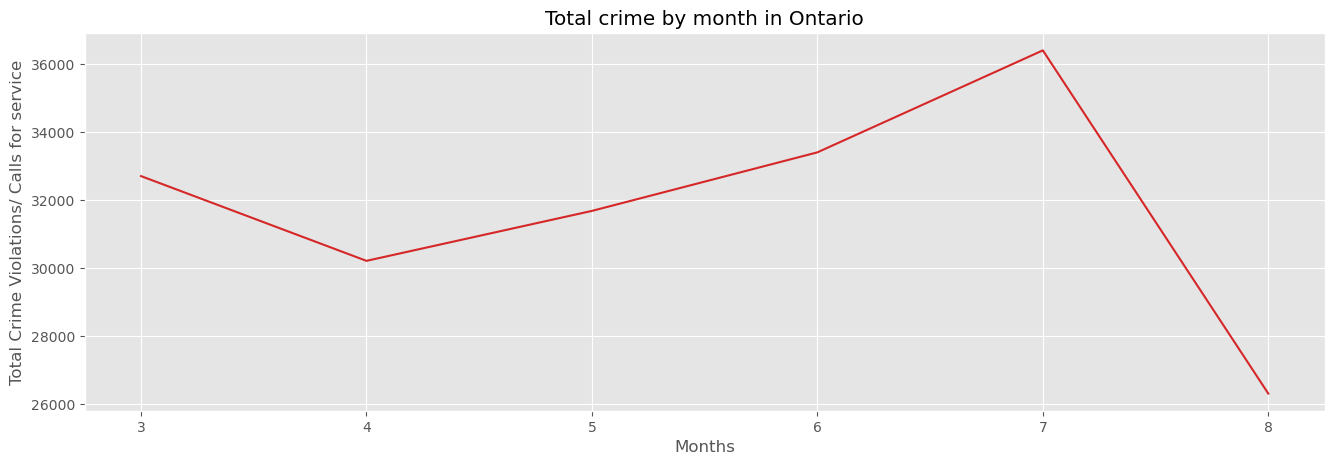

In [55]:
# We have data over 6 months. The below graph shows the total crime per month in Ontario

months = crimeOntario.Month.unique() 
clist = []
for i in months: 
    clist.append(crimeOntario["Cases"].loc[crimeOntario.Month == i].sum())

plot_df([], months, clist, title = "Total crime by month in Ontario", xlabel = "Months", ylabel = "Total Crime Violations/ Calls for service" )


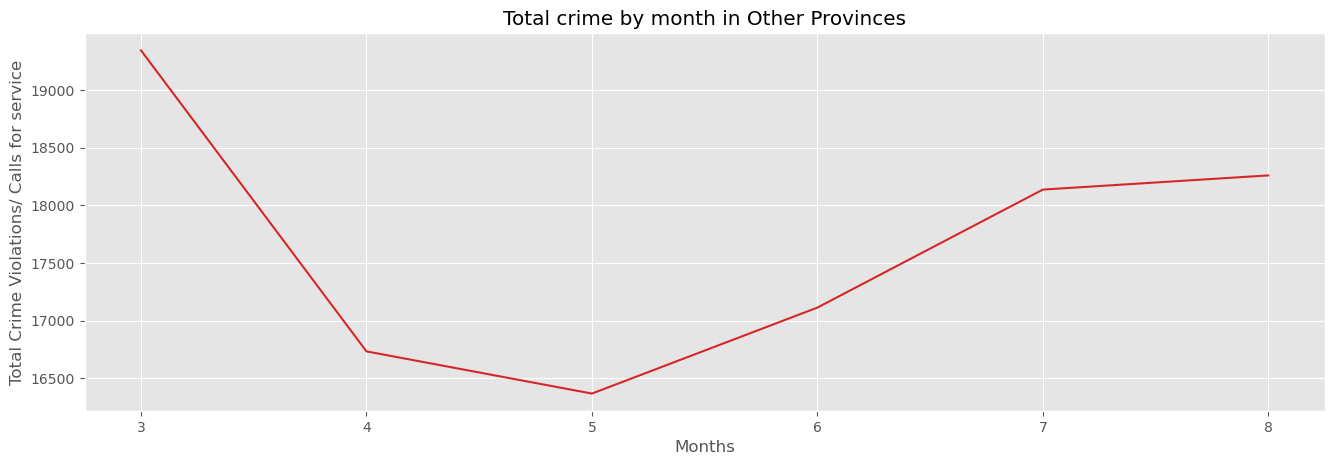

In [56]:
# We have data over 6 months. The below graph shows the total crime per month
# This data is for Other Provinces. 

months = crimeOther.Month.unique() 
clist = []
for i in months: 
    clist.append(crimeOther["Cases"].loc[crimeOther.Month == i].sum())

plot_df([], months, clist, title = "Total crime by month in Other Provinces", xlabel = "Months", ylabel = "Total Crime Violations/ Calls for service" )


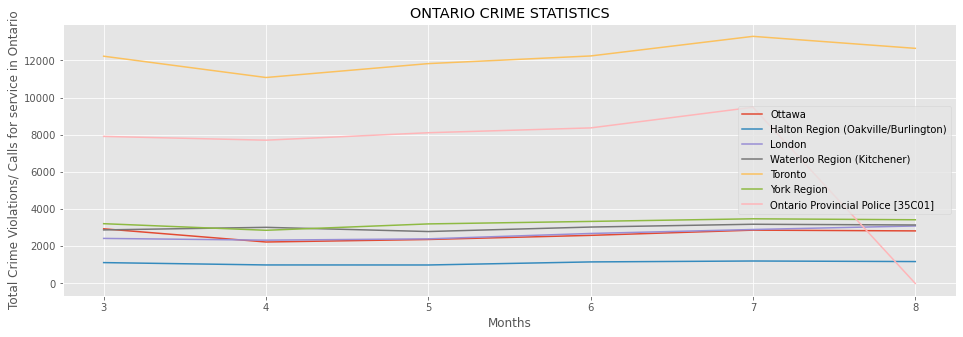

In [57]:
# Let's break it down by City in Ontario

plt.figure(figsize=(16,5))
plt.xlabel("Months")
plt.ylabel("Total Crime Violations/ Calls for service in Ontario")
plt.title("ONTARIO CRIME STATISTICS")

cclist = []
cities = crimeOntario.City.unique()
for i in cities: 
    for j in months:
        cclist.append(crimeOntario["Cases"].loc[(crimeOntario.Month == j) & (crimeOntario.City == i)].sum())
    plt.plot(months, cclist, label = i)
    cclist = []
plt.legend()
plt.show()

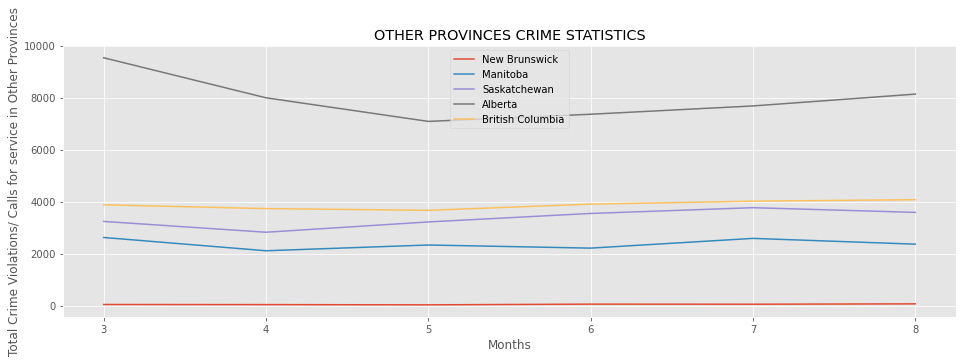

In [58]:
# And now by province

plt.figure(figsize=(16,5))
plt.xlabel("Months")
plt.ylabel("Total Crime Violations/ Calls for service in Other Provinces")
plt.title("OTHER PROVINCES CRIME STATISTICS")

cplist = []
prv = crimeOther.Province.unique()
for i in prv: 
    for j in months:
        cplist.append(crimeOther["Cases"].loc[(crimeOther.Month == j) & (crimeOther.Province == i)].sum())
    plt.plot(months, cplist, label = i)
    cplist = []
plt.legend()
plt.show()

PART 3 - ANALYSIS OF COVID DATA BY PROVINCE 

1. Preparing the data for analysis 
2. Checking trend of COVID cases over time

In [59]:
# This is information of covid cases country wide.
# We will use this to compare again crime in Other Provinces (not Ontario). 

covidurl = "https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv"
covid = pd.read_csv(covidurl, header = 0, usecols = [1,3,12,16], names = ["Province", "Date", "ConfirmedCases", "Death"])

In [60]:
covid.head()

,Province,Date,ConfirmedCases,Death
0,Ontario,2020-01-31,3,0.0
1,British Columbia,2020-01-31,1,0.0
2,Canada,2020-01-31,4,0.0
3,Ontario,2020-02-08,0,0.0
4,British Columbia,2020-02-08,3,0.0


In [61]:
covid.tail()

,Province,Date,ConfirmedCases,Death
4237,Yukon,2020-12-14,1,0.0
4238,Northwest Territories,2020-12-14,0,0.0
4239,Nunavut,2020-12-14,9,0.0
4240,Repatriated travellers,2020-12-14,0,0.0
4241,Canada,2020-12-14,6731,80.0


In [62]:
covid.Province.unique()

array(['Ontario', 'British Columbia', 'Canada', 'Quebec', 'Alberta',
       'Saskatchewan', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Prince Edward Island',
       'Northwest Territories', 'Nunavut', 'Yukon',
       'Repatriated travellers'], dtype=object)

In [63]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province        4242 non-null   object 
 1   Date            4242 non-null   object 
 2   ConfirmedCases  4242 non-null   int64  
 3   Death           4123 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.7+ KB


In [64]:
covido = covid[["Date", "Province", "ConfirmedCases"]]

In [65]:
covido["Date"] = pd.to_datetime(covido["Date"])

In [66]:
covido.set_index("Date", inplace = True)

In [67]:
covido.Province.unique()

array(['Ontario', 'British Columbia', 'Canada', 'Quebec', 'Alberta',
       'Saskatchewan', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Prince Edward Island',
       'Northwest Territories', 'Nunavut', 'Yukon',
       'Repatriated travellers'], dtype=object)

In [68]:
# The cases are captured here daily. Hence, we need to resample by month and get the sum of the daily cases

covidOther = covido.groupby("Province").resample('M').sum()
covidOther

ConfirmedCases
Province Date                      
Alberta  2020-03-31             747
         2020-04-30            4601
         2020-05-31            1655
         2020-06-30            1098
         2020-07-31            2735
...                             ...
Yukon    2020-08-31               1
         2020-09-30               0
         2020-10-31               8
         2020-11-30              24
         2020-12-31              12

[156 rows x 1 columns]

In [69]:
covidOther.reset_index(inplace = True)

In [70]:
covidOther["Month"] = covidOther["Date"].apply(lambda x : x.month)
covidOther["Year"] = covidOther["Date"].apply(lambda x : x.year)

In [71]:
covidOther = covidOther[~covidOther["Province"].str.contains("Canada")] 
covidOther = covidOther[~covidOther["Province"].str.contains("Repatriated travellers")] 


In [72]:
covidOther.set_index("Date", inplace = True)

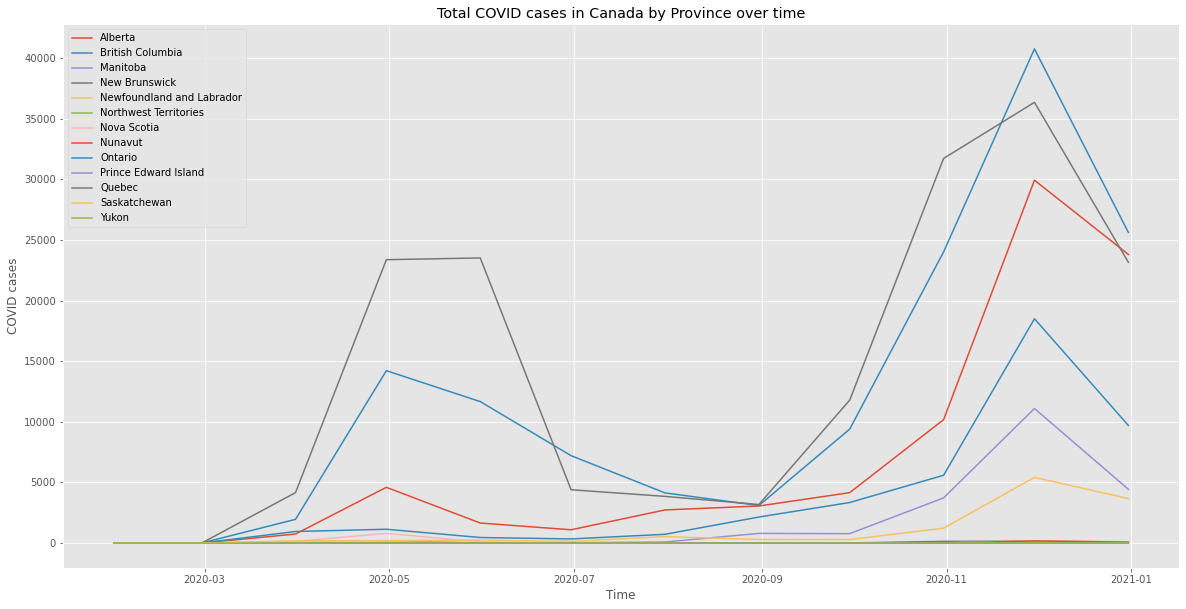

In [73]:
# Let's break it down by Provinces

plt.figure(figsize=(20,10))
plt.xlabel("Time")
plt.ylabel("COVID cases")
plt.title("Total COVID cases in Canada by Province over time")

dates = covidOther.index.unique().sort_values()
cvlist = []
provinces = covidOther.Province.unique()
for i in provinces: 
    for j in dates:
        cvlist.append(covidOther["ConfirmedCases"].loc[(covidOther.index == j) & (covidOther.Province == i)].sum())
    plt.plot(dates, cvlist, label = i)
    cvlist = []
    
plt.legend()
plt.show()

SUMMARY OF PART 3 : 
We can see a sudden increase in COVID cases in all provinces in May. Then there is again a huge spike in December. 

PART 4 - ANALYSIS OF COVID DATA IN ONTARIO 

1. Reading and preparing the data for analysis 
2. Checking number of cases by city
3. Checking trend of COVID cases over time regardless of City 
4. Checking trend of COVID cases over time per city

In [74]:
covidOntariourl = "https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv"
covidOntario = pd.read_csv(covidOntariourl, usecols = [1,3,4,5,6,7,8,13,14])


In [75]:
# Dropping columns we will not be using for analysis. 

covidOntario.drop(["Test_Reported_Date", "Specimen_Date", "Case_AcquisitionInfo", "Outcome1", "Reporting_PHU_Postal_Code"], axis = 1, inplace = True)

In [76]:
covidOntario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142121 entries, 0 to 142120
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Accurate_Episode_Date  142121 non-null  object
 1   Age_Group              142105 non-null  object
 2   Client_Gender          142121 non-null  object
 3   Reporting_PHU_City     142121 non-null  object
dtypes: object(4)
memory usage: 4.3+ MB


In [77]:
covidOntario.Reporting_PHU_City.unique()

array(['St. Thomas', 'Chatham', 'Stratford', 'Simcoe', 'Hamilton',
       'Brantford', 'Waterloo', 'London', 'Guelph', 'Barrie',
       'Mississauga', 'Newmarket', 'Whitby', 'Oakville', 'Port Hope',
       'Belleville', 'Pembroke', 'Cornwall', 'New Liskeard', 'Windsor',
       'Peterborough', 'Thorold', 'Owen Sound', 'Kingston', 'Thunder Bay',
       'Brockville', 'Point Edward', 'Sudbury', 'North Bay', 'Timmins',
       'Kenora', 'Sault Ste. Marie', 'Ottawa', 'Toronto'], dtype=object)

In [78]:
# To see total number of cases by City 

covidcount = []
Ontcities = covidOntario.Reporting_PHU_City.unique()
for i in Ontcities:
    covidcount.append(covidOntario.Accurate_Episode_Date.loc[covidOntario.Reporting_PHU_City == i].count())

covidCity = pd.DataFrame(covidcount, Ontcities)

In [79]:
covidCity.columns = ["COVID count"]

In [80]:
covidCity

,COVID count
St. Thomas,759
Chatham,545
Stratford,460
Simcoe,710
Hamilton,4260
Brantford,727
Waterloo,4493
London,2099
Guelph,1839
Barrie,2677


In [81]:
# In order for us to merge the two tables and check dependency, we need to ensure the city names in both tables match. 
# In order to do so, I will now add a region column in the covidOntario table to match the cities 
# in the COVID Ontario table. 

covidOntario.loc[covidOntario["Reporting_PHU_City"] == "Waterloo", "CityRegion"] = "Waterloo Region (Kitchener)"
covidOntario.loc[covidOntario["Reporting_PHU_City"] == "Oakville", "CityRegion"] = "Halton Region (Oakville/Burlington)"
covidOntario.loc[covidOntario["Reporting_PHU_City"] == "Newmarket", "CityRegion"] = "York Region"

In [82]:
covidOntario["CityRegion"].fillna(covidOntario["Reporting_PHU_City"], inplace = True)

In [83]:
covidOntario

,Accurate_Episode_Date,Age_Group,Client_Gender,Reporting_PHU_City,CityRegion
0,2020-10-30,50s,MALE,St. Thomas,St. Thomas
1,2020-11-19,30s,MALE,Chatham,Chatham
2,2020-12-02,<20,MALE,St. Thomas,St. Thomas
3,2020-11-22,50s,FEMALE,Stratford,Stratford
4,2020-12-01,40s,FEMALE,St. Thomas,St. Thomas
...,...,...,...,...,...
142116,2020-10-10,40s,MALE,Brantford,Brantford
142117,2020-11-04,20s,FEMALE,Toronto,Toronto
142118,2020-10-26,<20,MALE,Toronto,Toronto
142119,2020-09-29,90s,FEMALE,Toronto,Toronto


In [84]:
covidOntario["Accurate_Episode_Date"] = pd.to_datetime(covidOntario["Accurate_Episode_Date"])

In [85]:
covidOntario["Month"] = covidOntario["Accurate_Episode_Date"].apply(lambda x : x.month)
covidOntario["Year"] = covidOntario["Accurate_Episode_Date"].apply(lambda x : x.year)

In [86]:
# We need a way to count the number of cases per month. Right now each COVID case is one entry 
covidOntario["Count"] = 1

In [87]:
covidRegion = covidOntario[["Accurate_Episode_Date", "CityRegion", "Count"]]
covidRegion

,Accurate_Episode_Date,CityRegion,Count
0,2020-10-30,St. Thomas,1
1,2020-11-19,Chatham,1
2,2020-12-02,St. Thomas,1
3,2020-11-22,Stratford,1
4,2020-12-01,St. Thomas,1
...,...,...,...
142116,2020-10-10,Brantford,1
142117,2020-11-04,Toronto,1
142118,2020-10-26,Toronto,1
142119,2020-09-29,Toronto,1


In [88]:
covidRegion.set_index("Accurate_Episode_Date", inplace = True)

In [89]:
# We need to resample the covidOntario data. Also ensure we can get it broken down by city.

CovRegionSample = covidRegion.groupby("CityRegion").resample('M').sum()
CovRegionSample

Count
CityRegion  Accurate_Episode_Date       
Barrie      2020-03-31               111
            2020-04-30               222
            2020-05-31               157
            2020-06-30               126
            2020-07-31                59
...                                  ...
York Region 2020-08-31               232
            2020-09-30              1145
            2020-10-31              2542
            2020-11-30              4561
            2020-12-31              1600

[363 rows x 1 columns]

In [90]:
CovRegionSample.reset_index(inplace = True)

In [91]:
CovRegionSample["Month"] = CovRegionSample["Accurate_Episode_Date"].apply(lambda x : x.month)
CovRegionSample["Year"] = CovRegionSample["Accurate_Episode_Date"].apply(lambda x : x.year)

In [92]:
CovRegionSample.set_index("Accurate_Episode_Date", inplace = True)

In [93]:
CovRegionSample.index.unique()

DatetimeIndex(['2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2020-02-29', '2020-01-31',
               '2019-12-31'],
              dtype='datetime64[ns]', name='Accurate_Episode_Date', freq=None)

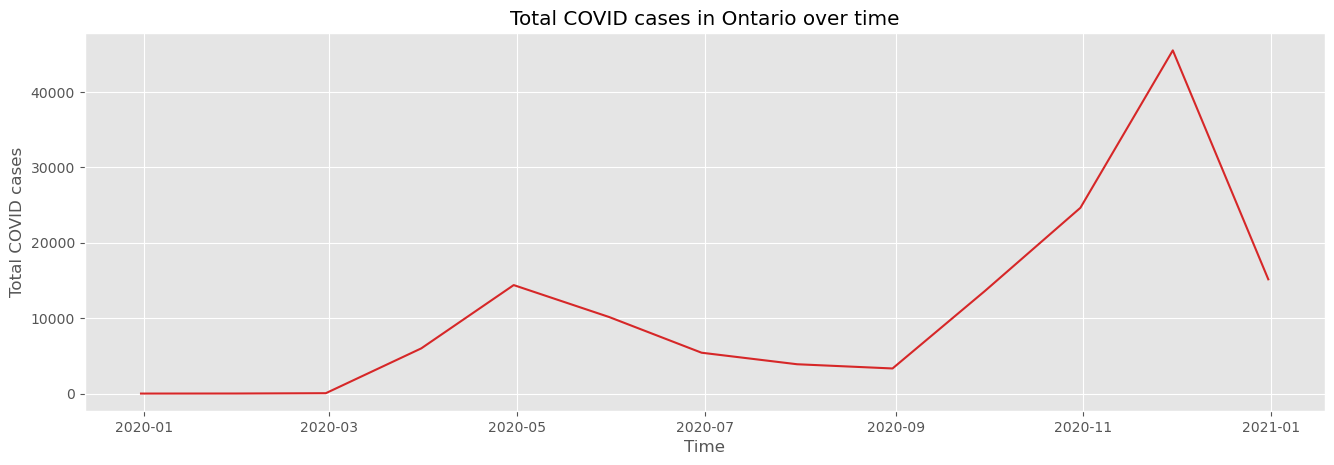

In [94]:
# The following graph shows the trend of COVID cases reported between December 2019 to the current date
# regardless of region. Next step would be to check COVID reporting by region within Ontario. 

covlist = []
dates = CovRegionSample.index.unique().sort_values()

for ii in dates: 
    covlist.append(CovRegionSample["Count"].loc[CovRegionSample.index == ii].sum())

plot_df([], dates, covlist, title = "Total COVID cases in Ontario over time", xlabel = "Time", ylabel = "Total COVID cases" )


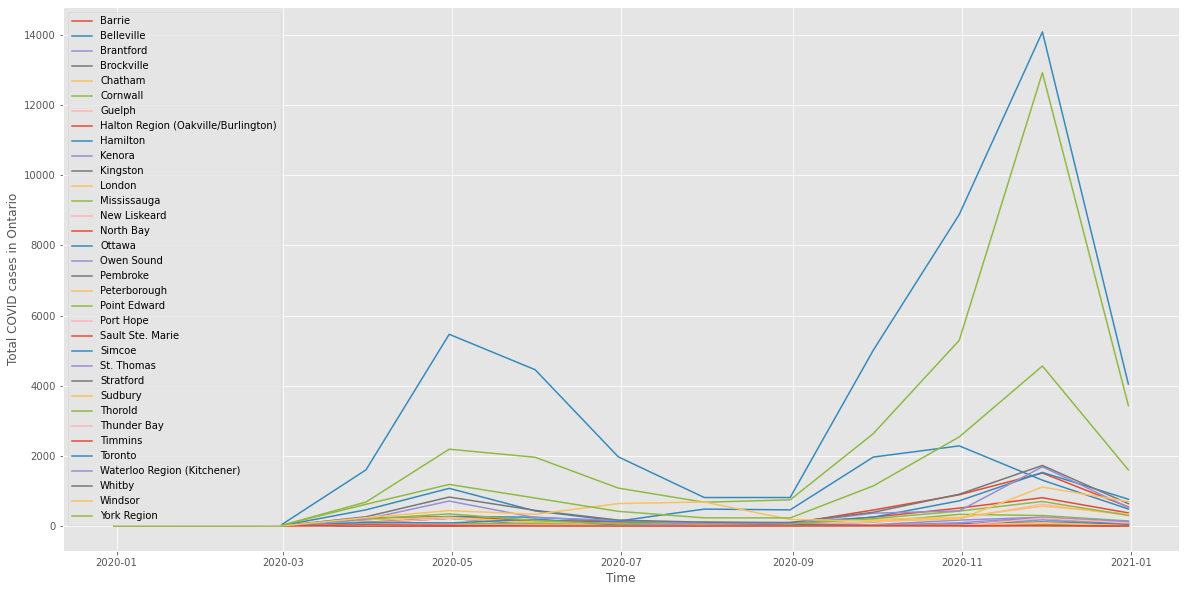

In [95]:
# Let's break it down by CityRegion

plt.figure(figsize=(20,10))
plt.xlabel("Time")
plt.ylabel("Total COVID cases in Ontario")

cvlist = []
regions = CovRegionSample.CityRegion.unique()
for i in regions: 
    for j in dates:
        cvlist.append(CovRegionSample["Count"].loc[(CovRegionSample.index == j) & (CovRegionSample.CityRegion == i)].sum())
    plt.plot(dates, cvlist, label = i)
    cvlist = []
    
plt.legend()
plt.show()

SUMMARY OF PART 4 : 
From the above graph we can see that Toronto has the highest number of COVID cases with it going up drastically from September to December. As a next step, let's combine this data with the crime data and check trends. Similar to the graph for other provinces, we can see that there was an initial surge in COVID cases in May and again the highest number in December.

PART 5 - ANALYSIS BY COMBINING COVID AND CRIME DATA 

SECTION A - ONTARIO 

1. Merging both CovidOntario and CrimeOntario dataframes
2. Combining data by city to check trend in COVID vs. Crime
3. Checking correlation between COVID and Crime by date 
4. Running regression analysis through statsmodel to see the effect of covid on crime over time. 
5. Checking autocorrelation between COVID cases over time and also Crime cases over time. 
6. Visualizing the trends in crimes and COVID data overall in Ontario over time 

SECTION B - OTHER PROVINCES 

1. Merging both CovidOntario and CrimeOntario dataframes
2. Combining data by Province to check trend in COVID vs. Crime (we saw a strong positive correlation)
3. Visualizing the trends in crime and COVID data overall in Other Provinces over time 


In [96]:
crimecovidOnt = crimeOntario.merge(CovRegionSample, how = 'inner', left_on = [crimeOntario.index, crimeOntario.City], right_on = [CovRegionSample.index, CovRegionSample.CityRegion])


In [97]:
# To note - In the COVID table, there is one entry for COVID per month. However, the crime table has multiple entries
# by date due to multiple crime types. 

crimecovidOnt

,key_0,key_1,GEO,Violations_Calls,VALUE,Crime_Category,Type,City,Province,Month_x,Year_x,Cases,CityRegion,Count,Month_y,Year_y
0,2020-03-31,Ottawa,"Ottawa, Ontario, municipal [35010]","assaults by non-family (levels 1, 2, 3)",236.0,assault,Outside,Ottawa,Ontario,3,2020,236.0,Ottawa,463,3,2020
1,2020-03-31,Ottawa,"Ottawa, Ontario, municipal [35010]","assaults by family (levels 1, 2, 3)",62.0,assault,Domestic,Ottawa,Ontario,3,2020,62.0,Ottawa,463,3,2020
2,2020-03-31,Ottawa,"Ottawa, Ontario, municipal [35010]",assaults where relationship type is unknown,0.0,assault,Miscellaneous,Ottawa,Ontario,3,2020,0.0,Ottawa,463,3,2020
3,2020-03-31,Ottawa,"Ottawa, Ontario, municipal [35010]","sexual assaults by non-family (levels 1, 2, 3)",51.0,assault,Outside,Ottawa,Ontario,3,2020,51.0,Ottawa,463,3,2020
4,2020-03-31,Ottawa,"Ottawa, Ontario, municipal [35010]","sexual assaults by family (levels 1, 2, 3)",4.0,assault,Domestic,Ottawa,Ontario,3,2020,4.0,Ottawa,463,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2020-08-31,York Region,"York Region, Ontario, municipal [35335]","calls for service, suicide/attempted suicide",114.0,suicide,Mental Health,York Region,Ontario,8,2020,114.0,York Region,232,8,2020
1004,2020-08-31,York Region,"York Region, Ontario, municipal [35335]","calls for service, overdose",NaN,overdose,Miscellaneous,York Region,Ontario,8,2020,0.0,York Region,232,8,2020
1005,2020-08-31,York Region,"York Region, Ontario, municipal [35335]","calls for service, child welfare check",NaN,welfare,Domestic,York Region,Ontario,8,2020,0.0,York Region,232,8,2020
1006,2020-08-31,York Region,"York Region, Ontario, municipal [35335]","calls for service, check welfare - general",622.0,welfare,Domestic,York Region,Ontario,8,2020,622.0,York Region,232,8,2020


In [98]:
crimecovidOnt.City.unique()

array(['Ottawa', 'Halton Region (Oakville/Burlington)', 'London',
       'Waterloo Region (Kitchener)', 'Toronto', 'York Region'],
      dtype=object)

In [99]:
crimecovidOnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1007
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key_0             1008 non-null   datetime64[ns]
 1   key_1             1008 non-null   object        
 2   GEO               1008 non-null   object        
 3   Violations_Calls  1008 non-null   object        
 4   VALUE             834 non-null    float64       
 5   Crime_Category    1008 non-null   object        
 6   Type              1008 non-null   object        
 7   City              1008 non-null   object        
 8   Province          1008 non-null   object        
 9   Month_x           1008 non-null   int64         
 10  Year_x            1008 non-null   int64         
 11  Cases             1008 non-null   float64       
 12  CityRegion        1008 non-null   object        
 13  Count             1008 non-null   int64         
 14  Month_y           1008 n

In [100]:
crimeOnMonthCount = crimecovidOnt
crimeOnMonthCount['Date']= pd.to_datetime(crimeOnMonthCount['key_0'])


In [101]:
crimeOnMonthCount= crimeOnMonthCount.set_index(pd.DatetimeIndex(crimeOnMonthCount['Date']))
crimeOnMonthCount

,key_0,key_1,GEO,Violations_Calls,VALUE,Crime_Category,Type,City,Province,Month_x,Year_x,Cases,CityRegion,Count,Month_y,Year_y,Date
Date,,,,,,,,,,,,,,,,,
2020-03-31,2020-03-31,Ottawa,"Ottawa, Ontario, municipal [35010]","assaults by non-family (levels 1, 2, 3)",236.0,assault,Outside,Ottawa,Ontario,3,2020,236.0,Ottawa,463,3,2020,2020-03-31
2020-03-31,2020-03-31,Ottawa,"Ottawa, Ontario, municipal [35010]","assaults by family (levels 1, 2, 3)",62.0,assault,Domestic,Ottawa,Ontario,3,2020,62.0,Ottawa,463,3,2020,2020-03-31
2020-03-31,2020-03-31,Ottawa,"Ottawa, Ontario, municipal [35010]",assaults where relationship type is unknown,0.0,assault,Miscellaneous,Ottawa,Ontario,3,2020,0.0,Ottawa,463,3,2020,2020-03-31
2020-03-31,2020-03-31,Ottawa,"Ottawa, Ontario, municipal [35010]","sexual assaults by non-family (levels 1, 2, 3)",51.0,assault,Outside,Ottawa,Ontario,3,2020,51.0,Ottawa,463,3,2020,2020-03-31
2020-03-31,2020-03-31,Ottawa,"Ottawa, Ontario, municipal [35010]","sexual assaults by family (levels 1, 2, 3)",4.0,assault,Domestic,Ottawa,Ontario,3,2020,4.0,Ottawa,463,3,2020,2020-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,2020-08-31,York Region,"York Region, Ontario, municipal [35335]","calls for service, suicide/attempted suicide",114.0,suicide,Mental Health,York Region,Ontario,8,2020,114.0,York Region,232,8,2020,2020-08-31
2020-08-31,2020-08-31,York Region,"York Region, Ontario, municipal [35335]","calls for service, overdose",NaN,overdose,Miscellaneous,York Region,Ontario,8,2020,0.0,York Region,232,8,2020,2020-08-31
2020-08-31,2020-08-31,York Region,"York Region, Ontario, municipal [35335]","calls for service, child welfare check",NaN,welfare,Domestic,York Region,Ontario,8,2020,0.0,York Region,232,8,2020,2020-08-31


In [102]:
#use CovRegionSample dataframe to get the number of covid cases by month
CovRegionSample

,CityRegion,Count,Month,Year
Accurate_Episode_Date,,,,
2020-03-31,Barrie,111,3,2020
2020-04-30,Barrie,222,4,2020
2020-05-31,Barrie,157,5,2020
2020-06-30,Barrie,126,6,2020
2020-07-31,Barrie,59,7,2020
...,...,...,...,...
2020-08-31,York Region,232,8,2020
2020-09-30,York Region,1145,9,2020
2020-10-31,York Region,2542,10,2020


In [103]:
crimeOnMonthCount = crimeOnMonthCount.resample('M').sum().dropna()

In [104]:
covidOnMonthCount = CovRegionSample["Count"].resample('M').sum()
covidOnMonthCount

Accurate_Episode_Date
2019-12-31        1
2020-01-31        8
2020-02-29       49
2020-03-31     5995
2020-04-30    14385
2020-05-31    10148
2020-06-30     5417
2020-07-31     3889
2020-08-31     3329
2020-09-30    13607
2020-10-31    24635
2020-11-30    45507
2020-12-31    15151
Freq: M, Name: Count, dtype: int64

In [105]:
df1= crimeOnMonthCount['Cases']
df1

Date
2020-03-31    24795.0
2020-04-30    22505.0
2020-05-31    23573.0
2020-06-30    25036.0
2020-07-31    26925.0
2020-08-31    26307.0
Freq: M, Name: Cases, dtype: float64

In [106]:
df2 = covidOnMonthCount
df2

Accurate_Episode_Date
2019-12-31        1
2020-01-31        8
2020-02-29       49
2020-03-31     5995
2020-04-30    14385
2020-05-31    10148
2020-06-30     5417
2020-07-31     3889
2020-08-31     3329
2020-09-30    13607
2020-10-31    24635
2020-11-30    45507
2020-12-31    15151
Freq: M, Name: Count, dtype: int64

In [107]:
# We do not have Crime data from September to December so these will be dropped for now to check against Crime. 

df3 = pd.concat([df1, df2], axis=1)
crimeCovidOn_re = df3.dropna()
crimeCovidOn_re

,Cases,Count
Accurate_Episode_Date,,
2020-03-31,24795.0,5995
2020-04-30,22505.0,14385
2020-05-31,23573.0,10148
2020-06-30,25036.0,5417
2020-07-31,26925.0,3889
2020-08-31,26307.0,3329


Text(0.5, 1.0, 'Dependence of Crime on COVID')

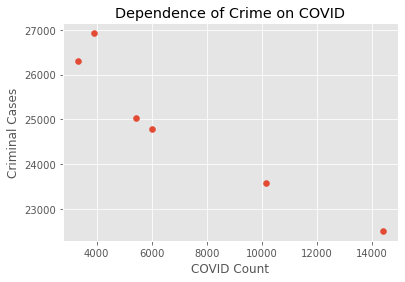

In [108]:
plt.scatter(crimeCovidOn_re.Count, crimeCovidOn_re.Cases)
plt.xlabel("COVID Count")
plt.ylabel("Criminal Cases")
plt.title("Dependence of Crime on COVID")

In [109]:
X = crimeCovidOn_re['Count']
y = crimeCovidOn_re['Cases']

# Add a constant so the model will choose an intercept. (Otherwise the model will fit a line through the origin).
X = sm.add_constant(X)

# Fit the OLS model
est = sm.OLS(y, X).fit();

# Check the results
est.summary();

/Users/shivangi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [110]:
est.params

const    27499.432183
Count       -0.367342
dtype: float64

In [111]:
# Slope
intercept = est.params[0] 
# Intercept
slope = est.params[1]
print (est.params)

const    27499.432183
Count       -0.367342
dtype: float64


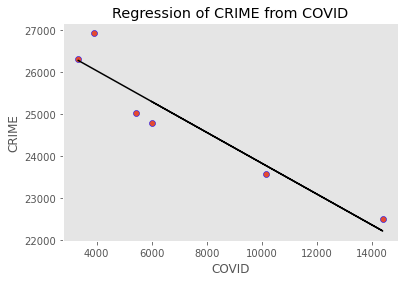

In [112]:
plt.scatter(crimeCovidOn_re.Count, crimeCovidOn_re.Cases, marker='o',edgecolors='b')
plt.plot(crimeCovidOn_re.Count, intercept + slope*crimeCovidOn_re.Count, 'k' )
plt.xlabel('COVID') 
plt.ylabel('CRIME')
plt.title('Regression of CRIME from COVID') ;
plt.grid();

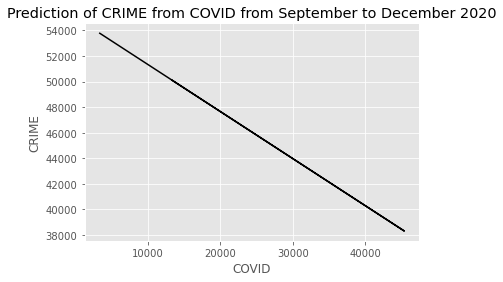

In [113]:
# Using statsmodels OLS to predict the # of crime in Ontario from Aug-Dec of 2020
# Using the existing monthly covid cases (Aug to Dec of 2020)

# No. of crime when covid case is in
'''
2020-08-31     3329
2020-09-30    13606
2020-10-31    24630
2020-11-30    45393
2020-12-31    13333
'''
crimeresarr = [] 
covidcase_arr=[3329, 13606, 24630, 45393,13333]
for covidcase in covidcase_arr:
    crimeresarr.append(intercept + slope * covidcase)
plt.plot(covidcase_arr, intercept + crimeresarr, 'k' )
plt.xlabel('COVID') 
plt.ylabel('CRIME')
plt.title('Prediction of CRIME from COVID from September to December 2020') ;


In [114]:
# Or using predict() to predict the number of crime from August to December
crimeOnCount=[]
crimeOnCount = est.predict([[1,3329],[1,13606],[1,24630],[1,45393],[1,13333]])

In [115]:
crimeOnCount

array([26276.54986672, 22501.37366759, 18451.79281529, 10824.66588891,
       22601.65809908])

In [116]:
dataset = pd.DataFrame({'CovidCase': covidcase_arr, 'CrimeCount':crimeOnCount}, columns =['CovidCase','CrimeCount'])

In [117]:
# the covid cases of Ontario from August to December 2020 
# and predicted crime numbers of Ontario from August to December 2020 
dataset

,CovidCase,CrimeCount
0,3329,26276.549867
1,13606,22501.373668
2,24630,18451.792815
3,45393,10824.665889
4,13333,22601.658099


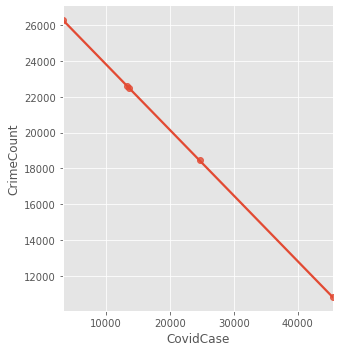

In [118]:
sns.lmplot('CovidCase', 'CrimeCount', data=dataset)

In [119]:
# calculate the correlation coefficient.
# There is a pretty strong correlation between the Number of Covid cases and the number of Criminal incidents in Ontario
# during the period of March to August of 2020.
crimeCovidOn_re['Cases'].corr(crimeCovidOn_re['Count'])

-0.9498123663124235

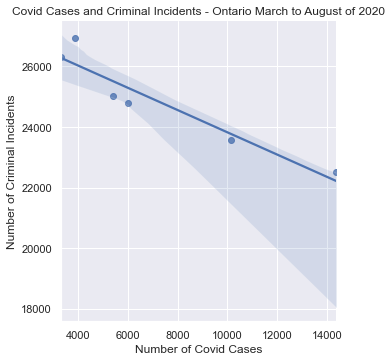

In [120]:
sns.set()
ax = sns.lmplot('Count', 'Cases', data = crimeCovidOn_re)
ax.set(xlabel = "Number of Covid Cases", ylabel = "Number of Criminal Incidents", title = "Covid Cases and Criminal Incidents - Ontario March to August of 2020")

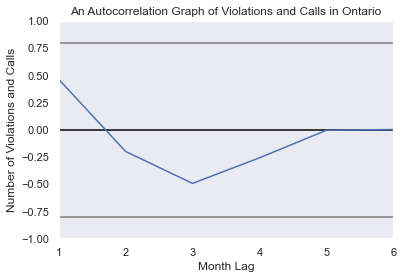

In [121]:
# Plot the autocorrelation of the number of crime "VALUE"
crimeCovidOn_rePlot = pd.plotting.autocorrelation_plot(crimeCovidOn_re['Cases'])
crimeCovidOn_rePlot.set_title("An Autocorrelation Graph of Violations and Calls in Ontario")
crimeCovidOn_rePlot.set_ylabel("Number of Violations and Calls")
crimeCovidOn_rePlot.set_xlabel("Month Lag")
None

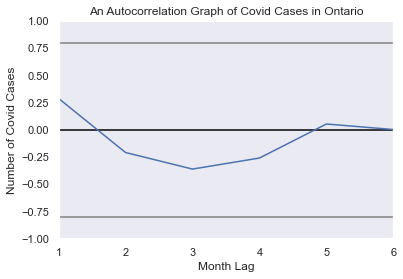

In [122]:
# Plot the autocorrelation of the number of covid "Count"

crimeCovidOn_rePlot = pd.plotting.autocorrelation_plot(crimeCovidOn_re['Count'])
crimeCovidOn_rePlot.set_title("An Autocorrelation Graph of Covid Cases in Ontario")
crimeCovidOn_rePlot.set_ylabel("Number of Covid Cases")
crimeCovidOn_rePlot.set_xlabel("Month Lag")
None

In [123]:
# prepare dataframe "crimeCovidOther_re" for autocorrelation of other provinces' crime and covid cases

In [124]:
crimeOtherMonthCount = crimeOther
#crimeOtherMonthCount['Date']= pd.to_datetime(crimeOtherMonthCount['key_0'])
crimeOtherMonthCount['Province'].unique()

array(['New Brunswick', 'Manitoba', 'Saskatchewan', 'Alberta',
       'British Columbia'], dtype=object)

In [125]:
crimeOtherMonthCount = crimeOtherMonthCount.resample('M').sum().dropna()

In [126]:
crimeOtherMonthCount

,VALUE,Month,Year,Cases
REF_DATE,,,,
2020-03-31,19345.0,672,452480,19345.0
2020-04-30,16733.0,896,452480,16733.0
2020-05-31,16367.0,1120,452480,16367.0
2020-06-30,17113.0,1344,452480,17113.0
2020-07-31,18137.0,1568,452480,18137.0
2020-08-31,18260.0,1792,452480,18260.0


In [127]:
# Get covid cases of other provinces, exclued Ontario
covidOtherMonthCount = covidOther[~covidOther["Province"].str.contains("Ontario")] 
covidOtherMonthCount['Province'].unique()

array(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Yukon'], dtype=object)

In [128]:
covidOtherMonthCount = covidOtherMonthCount.resample('M').sum().dropna()

In [129]:
covidOtherMonthCount

,ConfirmedCases,Month,Year
Date,,,
2020-01-31,1,1,2020
2020-02-29,6,2,2020
2020-03-31,6544,36,24240
2020-04-30,30466,48,24240
2020-05-31,26040,60,24240
2020-06-30,6048,72,24240
2020-07-31,7967,84,24240
2020-08-31,9536,96,24240
2020-09-30,20409,108,24240


In [130]:
df4 = crimeOtherMonthCount['VALUE']
df4

REF_DATE
2020-03-31    19345.0
2020-04-30    16733.0
2020-05-31    16367.0
2020-06-30    17113.0
2020-07-31    18137.0
2020-08-31    18260.0
Freq: M, Name: VALUE, dtype: float64

In [131]:
df5 = covidOtherMonthCount['ConfirmedCases']
df5

Date
2020-01-31         1
2020-02-29         6
2020-03-31      6544
2020-04-30     30466
2020-05-31     26040
2020-06-30      6048
2020-07-31      7967
2020-08-31      9536
2020-09-30     20409
2020-10-31     52666
2020-11-30    101933
2020-12-31     65094
Freq: M, Name: ConfirmedCases, dtype: int64

In [132]:
# concatenate the crime numbers and covid cases of other provinces into dataframe crimeCovidOther_re

df6 = pd.concat([df4, df5], axis=1)
crimeCovidOther_re = df6.dropna()
crimeCovidOther_re

,VALUE,ConfirmedCases
Date,,
2020-03-31,19345.0,6544
2020-04-30,16733.0,30466
2020-05-31,16367.0,26040
2020-06-30,17113.0,6048
2020-07-31,18137.0,7967
2020-08-31,18260.0,9536


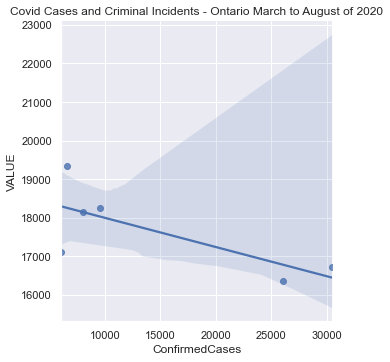

In [133]:
sns.lmplot("ConfirmedCases", "VALUE", data = crimeCovidOther_re);
ax = plt.gca();
ax.set_title("Covid Cases and Criminal Incidents - Ontario March to August of 2020");

In [134]:
X = crimeCovidOther_re['ConfirmedCases']
y = crimeCovidOther_re['VALUE']

# Add a constant so the model will choose an intercept. (Otherwise the model will fit a line through the origin).
X = sm.add_constant(X);

# Fit the OLS model
est = sm.OLS(y, X).fit();

# Check the results
est.summary();

/Users/shivangi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [135]:
# calculate the correlation coefficient.
# There is a correlation between the Number of Covid cases and the number of Criminal incidents in other provinces
# during the period of March to August of 2020.
crimeCovidOther_re['VALUE'].corr(crimeCovidOther_re['ConfirmedCases'])

-0.7339597270635329

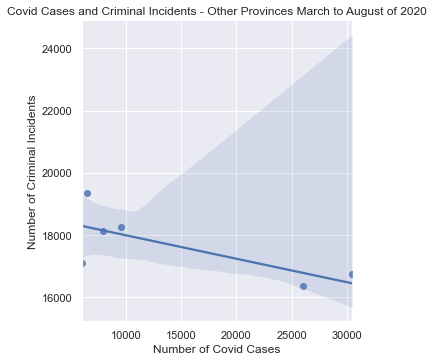

In [136]:
sns.set()
ax = sns.lmplot('ConfirmedCases', 'VALUE', data = crimeCovidOther_re)
ax.set(xlabel = "Number of Covid Cases", ylabel = "Number of Criminal Incidents", title = "Covid Cases and Criminal Incidents - Other Provinces March to August of 2020")

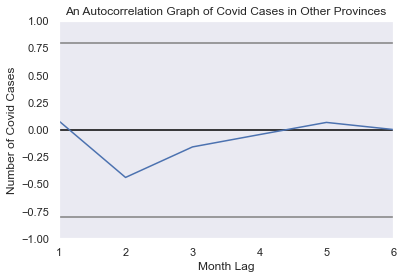

In [137]:
# Plot the autocorrelation of the number of covid "Count" for other provinces

crimeCovidOther_rePlot = pd.plotting.autocorrelation_plot(crimeCovidOther_re['ConfirmedCases'])
crimeCovidOther_rePlot.set_title("An Autocorrelation Graph of Covid Cases in Other Provinces")
crimeCovidOther_rePlot.set_ylabel("Number of Covid Cases")
crimeCovidOther_rePlot.set_xlabel("Month Lag")
None

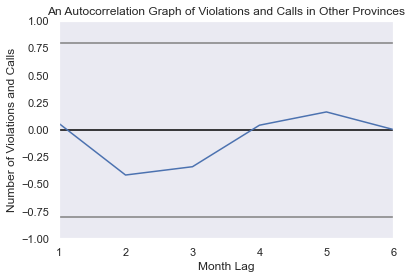

In [138]:
# Plot the autocorrelation of the number of crime "VALUE" for other provinces
crimeCovidOther_rePlot = pd.plotting.autocorrelation_plot(crimeCovidOther_re['VALUE'])
crimeCovidOther_rePlot.set_title("An Autocorrelation Graph of Violations and Calls in Other Provinces")
crimeCovidOther_rePlot.set_ylabel("Number of Violations and Calls")
crimeCovidOther_rePlot.set_xlabel("Month Lag")
None

In [139]:
# Preparing the data to check trends in COVID vs. Crime by city

sum_crime = []
num_covid = []
sum_covid = []

dates = crimecovidOnt.key_0.unique()
cities = crimecovidOnt.City.unique()

for i in cities: 
    sum_crime.append(crimecovidOnt["Cases"].loc[crimecovidOnt.City == i].sum()) 
    for j in dates:
        num_covid.append(crimecovidOnt["Count"].loc[(crimecovidOnt.City == i) & (crimecovidOnt.key_0 == j)].mean())
    sum_covid.append(sum(num_covid))
    num_covid = []

df_cc = pd.DataFrame()
df_cc["Cities"] = cities
df_cc["TotalCrime"] = sum_crime
df_cc["TotalCovid"] =  sum_covid
df_cc

,Cities,TotalCrime,TotalCovid
0,Ottawa,15810.0,3059.0
1,Halton Region (Oakville/Burlington),6651.0,901.0
2,London,15829.0,743.0
3,Waterloo Region (Kitchener),18050.0,1467.0
4,Toronto,73288.0,15126.0
5,York Region,19513.0,3496.0


Text(0.5, 1.0, 'TotalCrime vs. Total COVID in different cities - Ontario')

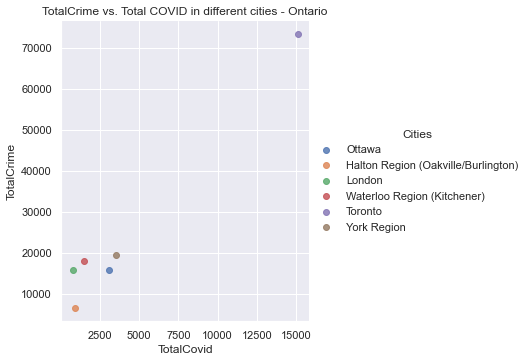

In [140]:
sns.lmplot("TotalCovid", "TotalCrime", data = df_cc, hue = "Cities")
ax = plt.gca()
ax.set_title("TotalCrime vs. Total COVID in different cities - Ontario")

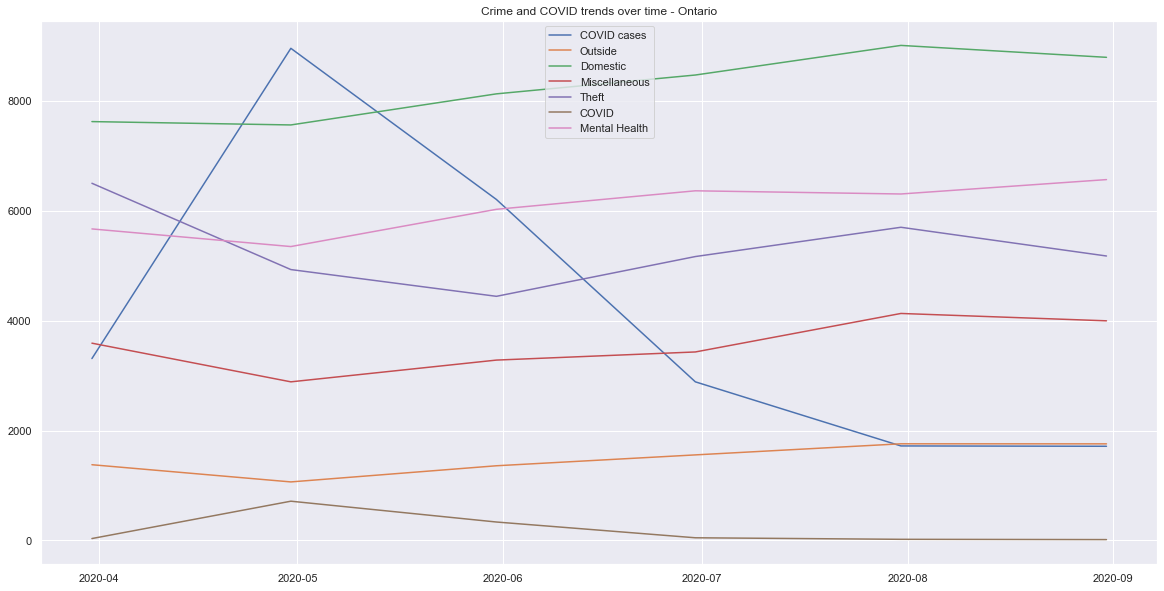

In [141]:
# Visualization

plt.figure(figsize=(20,10))

covlist = []
crlist = []
covbydate = []
crimebydate = []
crimes = crimecovidOnt.Type.unique()
dates = crimecovidOnt.key_0.unique()
regions = crimecovidOnt.CityRegion.unique()

for ii in dates: 
    for jj in regions:
        covlist.append(crimecovidOnt["Count"].loc[(crimecovidOnt.key_0 == ii) & (crimecovidOnt["CityRegion"] == jj)].mean())
    covbydate.append(sum(covlist))
    covlist = []

plt.plot(dates, covbydate, label = "COVID cases")

for i in crimes: 
    for j in dates:
        crimebydate.append(crimecovidOnt["Cases"].loc[(crimecovidOnt.key_0 == j) & (crimecovidOnt["Type"] == i)].sum())
    plt.plot(dates, crimebydate, label = i)
    crimebydate = []
ax = plt.gca()
ax.set_title("Crime and COVID trends over time - Ontario")    
plt.legend()
plt.show()

From the above graph, the police calls related to COVID are directly linked to COVID cases. 

However, most crime were at an all time low in May when the COVID cases were high.


In [142]:
crimecovidOther = crimeOther.merge(covidOther, how = 'inner', left_on = [crimeOther.index, crimeOther.Province], right_on = [covidOther.index, covidOther.Province])


In [143]:
crimecovidOther

,key_0,key_1,GEO,Violations_Calls,VALUE,Crime_Category,Type,City,Province_x,Month_x,Year_x,Cases,Province_y,ConfirmedCases,Month_y,Year_y
0,2020-03-31,New Brunswick,"Kennebecasis Region, New Brunswick, municipal ...","assaults by non-family (levels 1, 2, 3)",5.0,assault,Outside,Kennebecasis Region,New Brunswick,3,2020,5.0,New Brunswick,70,3,2020
1,2020-03-31,New Brunswick,"Kennebecasis Region, New Brunswick, municipal ...","assaults by family (levels 1, 2, 3)",9.0,assault,Domestic,Kennebecasis Region,New Brunswick,3,2020,9.0,New Brunswick,70,3,2020
2,2020-03-31,New Brunswick,"Kennebecasis Region, New Brunswick, municipal ...",assaults where relationship type is unknown,0.0,assault,Miscellaneous,Kennebecasis Region,New Brunswick,3,2020,0.0,New Brunswick,70,3,2020
3,2020-03-31,New Brunswick,"Kennebecasis Region, New Brunswick, municipal ...","sexual assaults by non-family (levels 1, 2, 3)",1.0,assault,Outside,Kennebecasis Region,New Brunswick,3,2020,1.0,New Brunswick,70,3,2020
4,2020-03-31,New Brunswick,"Kennebecasis Region, New Brunswick, municipal ...","sexual assaults by family (levels 1, 2, 3)",0.0,assault,Domestic,Kennebecasis Region,New Brunswick,3,2020,0.0,New Brunswick,70,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,2020-08-31,British Columbia,"Victoria, British Columbia, municipal [59025]","calls for service, suicide/attempted suicide",18.0,suicide,Mental Health,Victoria,British Columbia,8,2020,18.0,British Columbia,2149,8,2020
1340,2020-08-31,British Columbia,"Victoria, British Columbia, municipal [59025]","calls for service, overdose",NaN,overdose,Miscellaneous,Victoria,British Columbia,8,2020,0.0,British Columbia,2149,8,2020
1341,2020-08-31,British Columbia,"Victoria, British Columbia, municipal [59025]","calls for service, child welfare check",NaN,welfare,Domestic,Victoria,British Columbia,8,2020,0.0,British Columbia,2149,8,2020
1342,2020-08-31,British Columbia,"Victoria, British Columbia, municipal [59025]","calls for service, check welfare - general",1.0,welfare,Domestic,Victoria,British Columbia,8,2020,1.0,British Columbia,2149,8,2020


In [144]:
sum_crime_oth = []
num_covid_oth = []
sum_covid_oth = []

dates = crimecovidOther.key_0.unique()
provinces = crimecovidOther.Province_x.unique()

for i in provinces: 
    sum_crime_oth.append(crimecovidOther["Cases"].loc[crimecovidOther.Province_x == i].sum()) 
    for j in dates:
        num_covid_oth.append(crimecovidOther["ConfirmedCases"].loc[(crimecovidOther.Province_x == i) & (crimecovidOther.key_0 == j)].mean())
    sum_covid_oth.append(sum(num_covid_oth))
    num_covid_oth = []

    
df_cco = pd.DataFrame()
df_cco["Province"] = provinces
df_cco["TotalCrime"] = sum_crime_oth
df_cco["TotalCovid"] =  sum_covid_oth
df_cco

,Province,TotalCrime,TotalCovid
0,New Brunswick,357.0,191.0
1,Manitoba,14274.0,1214.0
2,Saskatchewan,20220.0,1619.0
3,Alberta,47797.0,13895.0
4,British Columbia,23307.0,5776.0


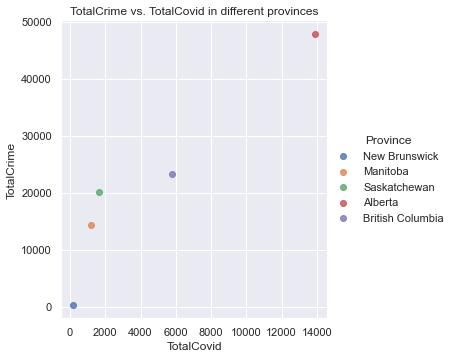

In [145]:
sns.lmplot("TotalCovid", "TotalCrime", data = df_cco, hue = "Province");
ax = plt.gca();
ax.set_title("TotalCrime vs. TotalCovid in different provinces");

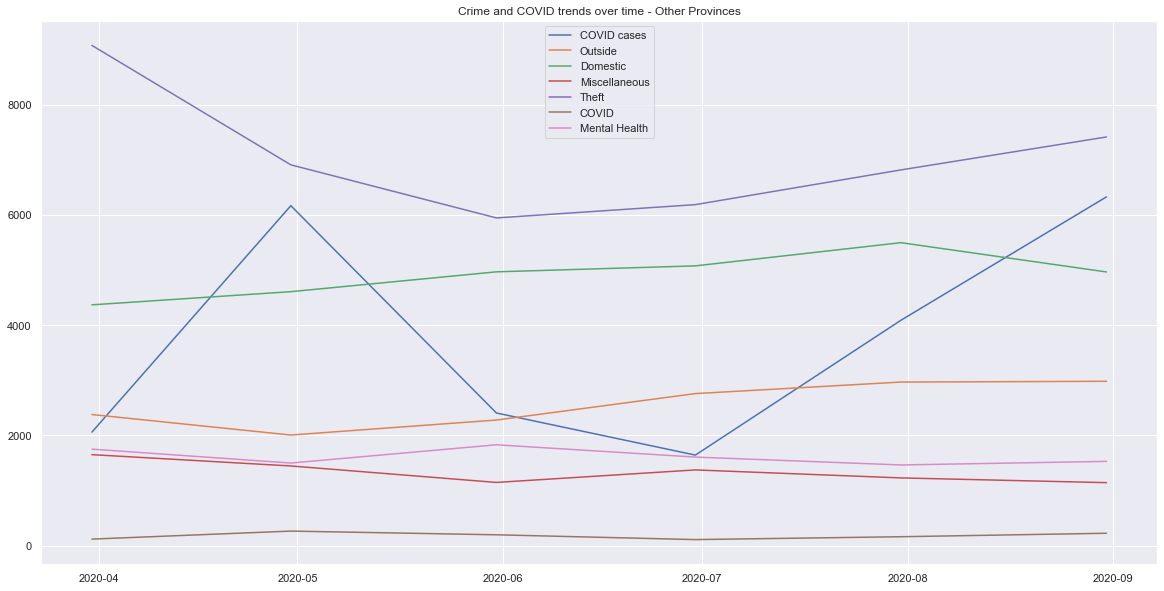

In [146]:
# Visualization

plt.figure(figsize=(20,10))

covlist = []
crlist = []
covbydate = []
crimebydate = []
crimes = crimecovidOther.Type.unique()
dates = crimecovidOther.key_0.unique()
regions = crimecovidOther.Province_x.unique()

for ii in dates: 
    for jj in regions:
        covlist.append(crimecovidOther["ConfirmedCases"].loc[(crimecovidOther.key_0 == ii) & (crimecovidOther["Province_x"] == jj)].mean())
    covbydate.append(sum(covlist))
    covlist = []

plt.plot(dates, covbydate, label = "COVID cases")

for i in crimes: 
    for j in dates:
        crimebydate.append(crimecovidOther["Cases"].loc[(crimecovidOther.key_0 == j) & (crimecovidOther["Type"] == i)].sum())
    plt.plot(dates, crimebydate, label = i)
    crimebydate = []

ax = plt.gca()
ax.set_title("Crime and COVID trends over time - Other Provinces")
plt.legend()
plt.show()

From the above graph, we can see the domestic crime steadily increase as COVID spread through the country. While theft was at an all time low in June, its been increasing since the COVID cases have started going up again indicating financial troubles in these difficult times. 

PART 6 - LINEAR REGRESSION 

The following analysis focusses on how Crime and COVID are affected by region. The findings here show that Crime this year was not just a factor of COVID, but both Crime and COVID depended on other factors such as population. The cities that had a higher population, saw a linear increase in both crime and COVID overall. 

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics

SECTION 1 - Ontario data

In [148]:
df_cc

,Cities,TotalCrime,TotalCovid
0,Ottawa,15810.0,3059.0
1,Halton Region (Oakville/Burlington),6651.0,901.0
2,London,15829.0,743.0
3,Waterloo Region (Kitchener),18050.0,1467.0
4,Toronto,73288.0,15126.0
5,York Region,19513.0,3496.0


Before we can do a linear regression, we need to convert the categorical values into numerical values.

We will use pd.get_dummies( ) for this. 

pd.get_dummies( ) function will create a new dataframe which consists of zeros and ones for the specified variable. The specified variable (in this case Cities) is turned into multiple dummy variables

In [149]:
dummies = pd.get_dummies(df_cc['Cities'])
dummies

,Halton Region (Oakville/Burlington),London,Ottawa,Toronto,Waterloo Region (Kitchener),York Region
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0
5,0,0,0,0,0,1


In [150]:
# Since we have created a whole new dataframe, in order to compute it to our original dataframe, 
# we're going to need to either merge or concatneate them to work with them properly. 
# Because the old and new dataset don't have any columns in common, 
# it would make more sense to use concatenate rather than merge. However, both can be done.

merged = pd.concat([df_cc, dummies], axis=1)
merged

,Cities,TotalCrime,TotalCovid,Halton Region (Oakville/Burlington),London,Ottawa,Toronto,Waterloo Region (Kitchener),York Region
0,Ottawa,15810.0,3059.0,0,0,1,0,0,0
1,Halton Region (Oakville/Burlington),6651.0,901.0,1,0,0,0,0,0
2,London,15829.0,743.0,0,1,0,0,0,0
3,Waterloo Region (Kitchener),18050.0,1467.0,0,0,0,0,1,0
4,Toronto,73288.0,15126.0,0,0,0,1,0,0
5,York Region,19513.0,3496.0,0,0,0,0,0,1


Now two things need to be done before we proceed further with Linear Reg:
        1) The original "Cities" column needs to be dropped
        2) One of the dummy variable columns needs to be dropped

The reason for this is to avoid the Dummy Variable Trap. The Dummy Variable Trap is a scenario in which the independent variables (cities) are multicollinear. This means that all 6 variables are highly correlated with each other. The relationship between the independent variables is SO strong that one dummy variable can be easily derived from the other dummy variables. Due to this, linear regression will not work as expected, and hence why one of the dummy variable columns needs to be dropped.

Number of Dummy Variables = Categorical Values - 1

In [151]:
final = merged.drop(['Cities', 'York Region'], axis=1)
final

,TotalCrime,TotalCovid,Halton Region (Oakville/Burlington),London,Ottawa,Toronto,Waterloo Region (Kitchener)
0,15810.0,3059.0,0,0,1,0,0
1,6651.0,901.0,1,0,0,0,0
2,15829.0,743.0,0,1,0,0,0
3,18050.0,1467.0,0,0,0,0,1
4,73288.0,15126.0,0,0,0,1,0
5,19513.0,3496.0,0,0,0,0,0


In [152]:
X = final.drop('TotalCrime', axis=1)
y = final['TotalCrime']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [154]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [155]:
reg.predict(X_test)

array([37118.89080912, 17397.6002647 ])

In [156]:
# 1 is the ideal R2 score here so 0.97 shows that there is a strong effect of COVID + location on Crime data. 
reg.score(X,y) 

0.549722383202117

SECTION 2 - OTHER PROVINCES

In [157]:
df_cco

,Province,TotalCrime,TotalCovid
0,New Brunswick,357.0,191.0
1,Manitoba,14274.0,1214.0
2,Saskatchewan,20220.0,1619.0
3,Alberta,47797.0,13895.0
4,British Columbia,23307.0,5776.0


In [158]:
#Create the proper dummy variables for the Provinces

dummies2 = pd.get_dummies(df_cco['Province'])
dummies2

,Alberta,British Columbia,Manitoba,New Brunswick,Saskatchewan
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,1,0,0,0


In [159]:
#Merge the two dataframes into 1

merged2 = pd.concat([df_cco, dummies2], axis=1)
merged2

,Province,TotalCrime,TotalCovid,Alberta,British Columbia,Manitoba,New Brunswick,Saskatchewan
0,New Brunswick,357.0,191.0,0,0,0,1,0
1,Manitoba,14274.0,1214.0,0,0,1,0,0
2,Saskatchewan,20220.0,1619.0,0,0,0,0,1
3,Alberta,47797.0,13895.0,1,0,0,0,0
4,British Columbia,23307.0,5776.0,0,1,0,0,0


In [160]:
#1) Drop the "Province" Dataframe in order to avoid duplicate values
#2) Drop one of the Dummy Variables to avoid the Dummy Variable Trap

final2 = merged2.drop(['Province', 'Saskatchewan'], axis=1)
final2

,TotalCrime,TotalCovid,Alberta,British Columbia,Manitoba,New Brunswick
0,357.0,191.0,0,0,0,1
1,14274.0,1214.0,0,0,1,0
2,20220.0,1619.0,0,0,0,0
3,47797.0,13895.0,1,0,0,0
4,23307.0,5776.0,0,1,0,0


In [161]:
X2 = final2.drop('TotalCrime', axis=1)
y2 = final2['TotalCrime']

In [162]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2)

In [163]:
reg2 = LinearRegression()
reg2.fit(X_train2, y_train2)

LinearRegression()

In [164]:
reg2.predict(X_test2)

array([47693.86224813])

In [165]:
reg2.score(X2,y2)

0.9999910999028979

In [166]:
testcovOn = crimeOntario.merge(CovRegionSample, how = 'right', left_index = True, right_index = True)

In [167]:
testcovOn = testcovOn[testcovOn.index > "2020-08-31"]
#testcovOn

In [168]:
# Preparing the Ontario data to use the linear regression model to predict. The following includes the COVID data
# from September to December 2020 which were not including in training the model. Here, we do not have the crime data
# so we would like to predict.
num_covid = []
sum_covid = []

dates = testcovOn.index.unique()
cities = df_cc["Cities"]

for i in cities: 
    for j in dates:
        num_covid.append(testcovOn["Count"].loc[(testcovOn.CityRegion == i) & (testcovOn.index == j)].mean())
    sum_covid.append(sum(num_covid))
    num_covid = []

df_ontest = pd.DataFrame()
df_ontest["Cities"] = cities
df_ontest["TotalCovid"] =  sum_covid
df_ontest

,Cities,TotalCovid
0,Ottawa,6047.0
1,Halton Region (Oakville/Burlington),3409.0
2,London,1354.0
3,Waterloo Region (Kitchener),3023.0
4,Toronto,32019.0
5,York Region,9848.0


In [169]:
# Now we do the same for Other Provinces 

testcovOth = crimeOther.merge(covidOther, how = 'right', left_index = True, right_index = True)
testcovOth = testcovOth[testcovOth.index > "2020-08-31"]
# testcovOth

In [170]:
num_covid_oth = []
sum_covid_oth = []

dates = testcovOth.index.unique()
provinces = df_cco.Province.unique()

for i in provinces:  
    for j in dates:
        num_covid_oth.append(testcovOth["ConfirmedCases"].loc[(testcovOth.Province_y == i) & (testcovOth.index == j)].mean())
    sum_covid_oth.append(sum(num_covid_oth))
    num_covid_oth = []

    
df_OthTest = pd.DataFrame()
df_OthTest["Province"] = provinces
df_OthTest["TotalCovid"] =  sum_covid_oth
df_OthTest

,Province,TotalCovid
0,New Brunswick,367.0
1,Manitoba,20050.0
2,Saskatchewan,10619.0
3,Alberta,68084.0
4,British Columbia,37153.0


In [171]:
# Running the prepared linear regression models on these values to predict crime rates. 

In [172]:
# First Ontario 

mergedTestOn_X = pd.concat([df_ontest, dummies], axis=1)
mergedTestOn_X = mergedTestOn_X.drop(['Cities', 'York Region'], axis=1)

In [173]:
result_Ont = reg.predict(mergedTestOn_X)

Text(0.5, 1.0, 'Predicted Crime based on COVID - Ontario')

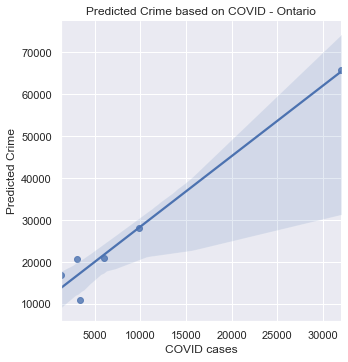

In [174]:
df_OntarioTrend = pd.DataFrame()
df_OntarioTrend["Predicted Crime"] = result_Ont
df_OntarioTrend["COVID cases"] = df_ontest["TotalCovid"]

sns.lmplot("COVID cases", "Predicted Crime", data = df_OntarioTrend);
ax = plt.gca()
ax.set_title("Predicted Crime based on COVID - Ontario")

In [175]:
# Now Other Provinces 

mergedTestOth_X = pd.concat([df_OthTest, dummies2], axis=1)
mergedTestOth_X = mergedTestOth_X.drop(['Province', 'Saskatchewan'], axis=1)

In [176]:
result_Oth = reg2.predict(mergedTestOth_X)

Text(0.5, 1.0, 'Predicted Crime based on COVID - Other Provinces')

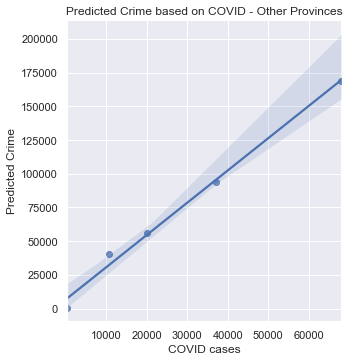

In [177]:
df_OtherTrend = pd.DataFrame()
df_OtherTrend["Predicted Crime"] = result_Oth
df_OtherTrend["COVID cases"] = df_OthTest["TotalCovid"]

sns.lmplot("COVID cases", "Predicted Crime", data = df_OtherTrend);
ax = plt.gca()
ax.set_title("Predicted Crime based on COVID - Other Provinces")

### Conclusions:

- There was a definite increase in the amount of crime in Canada in 2020 ascompared to 2019.
- Crimes that relate to outdoor-activity were lower indicating a possible impact ofCOVID due to the lockdown.
- Crimes that relate to indoor activity, such as mental health calls and domesticdisturbances, have increased during COVID. We can attribute this to thenegative psychological impact of the lockdown, financial stress and also theweariness resulting from this pandemic.
- I ran linear regression models to find a relationship between Crime data andCovid data and found that criminal activity is definitely impacted by Covid.
- Based on the OLS model that I ran over time, I can see that there is a slightnegative correlation between COVID and Crime. This could be due to the decrease in outdoor crimes and less calls for service.
- When I ran the regression model by region, we noticed that there was a strongpositive correlation between COVID and Crime. On deeper study, we realizedthat this is due to other factors, including population. The demographics ofeach city/region affects both crime and COVID.

### LEGEND FOR "TYPE" OF CRIME

'assaults by non-family (levels 1, 2, 3)' (Outside) DONE 
'assaults by family (levels 1, 2, 3)', (Domestic) DONE 
'assaults where relationship type is unknown' (Miscellaneous) DONE 
'sexual assaults by non-family (levels 1, 2, 3)' (Outside) DONE 
'sexual assaults by family (levels 1, 2, 3)', (Domestic) DONE 
'sexual assaults where relationship type is unknown' (Miscellaneous) DONE 
'assault against peace or public officer (level 1) [1460]' (Outside) DONE 
'uttering threats by non-family' (Outside) DONE 
'uttering threats by family' (Domestic) DONE 
'uttering threats where relationship type is unknown' (Miscellaneous) DONE 
'dangerous operation, causing death or bodily harm [911]' (Outside) DONE 
'impaired driving, causing death or bodily harm [921]' (Outside) DONE 
'breaking and entering, non-residential' (Theft) DONE 
'breaking and entering, residential', 'motor vehicle theft [2135]' (Theft) DONE 
'shoplifting [213]', (Theft) DONE 
'fraud/identity theft/identity fraud [216]' (Theft) DONE 
'fail to comply with order [3410]' (Miscellaneous) DONE 
'impaired driving, operating while impaired [923]' (Outdoor) DONE 
'provincial/territorial acts related to covid-19' (COVID) DONE 
'calls for service, domestic disturbances / disputes' (Domestic) DONE 
'calls for service, mental health act (mha) apprehension', (Mental Health) DONE 
'calls for service, mental health - other', (Mental Health) DONE 
'calls for service, suicide/attempted suicide' (Mental Health) DONE 
'calls for service, overdose' (Miscellaneous) DONE 
'calls for service, child welfare check' (Domestic) DONE 
'calls for service, check welfare - general' (Domestic) DONE 
'calls for service, child custody matter - domestic' (Domestic) DONE 